In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[12,5]
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,recall_score,precision_score
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
import statsmodels.api as sm
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,kruskal
from scipy import stats

In [3]:
data=pd.read_csv('DataCoSupplyChain.csv',encoding='latin1')
pd.options.display.max_columns=None
data.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [420]:
#checking data types
data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [4]:
# changing the datatype of wrongly classified columns
data['Late_delivery_risk']=data['Late_delivery_risk'].astype('object')

In [422]:
data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                object
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [423]:
data.shape

(180519, 53)

In [424]:
# unique number of values
data.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [425]:
# finding null values
data.isnull().sum().sort_values(ascending=False).head(6)

Product Description       180519
Order Zipcode             155679
Customer Lname                 8
Customer Zipcode               3
Type                           0
Order Profit Per Order         0
dtype: int64

In [426]:
# percentage of null values
(data.isnull().sum()/len(data)*100).sort_values(ascending=False).head(6)

Product Description       100.000000
Order Zipcode              86.239676
Customer Lname              0.004432
Customer Zipcode            0.001662
Type                        0.000000
Order Profit Per Order      0.000000
dtype: float64

In [5]:
# we create a copy of the data for further analysis
df=data.copy()

In [6]:
#we create a new column by attactching customer fname, lname to create full name
df['customer full name']= df['Customer Fname']+df['Customer Lname']

In [429]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,customer full name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna


In [430]:
# we create a new columns 'Late by no. of days' by subtracting
# "Days for shipment (real)" - "Days for shipment (scheduled)" ="Late by(Days)"

In [7]:
df["Late by(Days)"]=df['Days for shipping (real)']-df['Days for shipment (scheduled)']

In [432]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,1


In [433]:
df['Late by(Days)'].value_counts()

 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: Late by(Days), dtype: int64

### Drop Columns

In [434]:
# we are droping the columns with most null values,(86%,100%)
# we are droping the columns which are redundant,repetitive

In [435]:
df.drop(['Category Id','Customer Email','Customer Fname','Customer Id','Customer Lname','Customer Password','Customer Zipcode',
          'Customer Street','Department Id','Latitude','Longitude','Order Customer Id','Order Id','Order Item Cardprod Id',
          'Order Item Total','Order Item Id','Order Profit Per Order','Order Zipcode','Product Image','Product Card Id',
         'Product Category Id','Product Description','Product Status'],axis=1,inplace=True)

In [436]:
df.shape

(180519, 32)

In [437]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1


### Rename Columns

In [438]:
# we are renaming to columns according to the data description for easy understanding
df.rename({'Customer City':'Source City','Customer Country':'Source Country','Customer State':'Source State',
           'Market':'Destination Market','Order City':'Destination City','Order Country':'Destination Country',
           'Order Region':'Destination Region','Order State':'Destination State'},axis=1,inplace=True)

In [439]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1


### Null Value Treatment

In [440]:
df.isnull().sum().sort_values().tail()
# we can see we have only 8 rows which have null values in customer full name

Benefit per order                0
Days for shipment (scheduled)    0
Days for shipping (real)         0
Late by(Days)                    0
customer full name               8
dtype: int64

In [441]:
# we drop the null value rows
df.dropna(inplace=True)

In [442]:
df.isnull().sum()
# we can see that there are no nullvalues in the data

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Source City                      0
Source Country                   0
Customer Segment                 0
Source State                     0
Department Name                  0
Destination Market               0
Destination City                 0
Destination Country              0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Destination Region               0
Destination State                0
Order Status                     0
Product Name                     0
Product Price                    0
shipping date (DateO

In [443]:
df.shape

(180511, 32)

### Outlier Checking

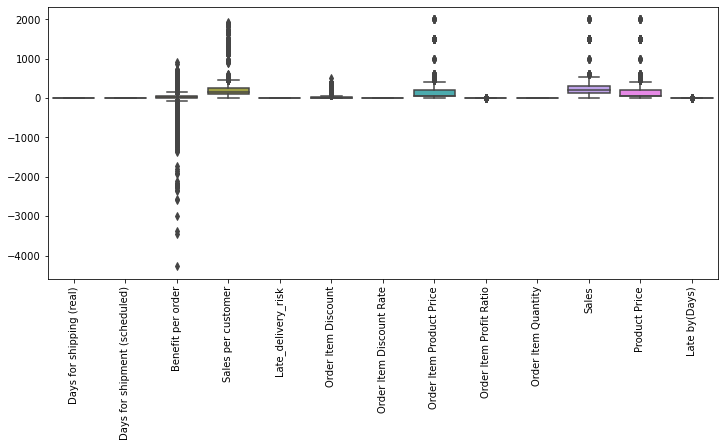

In [444]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
# we can observe that there are outliers present in most of the columns.

In [445]:
df.std()

Days for shipping (real)           1.623734
Days for shipment (scheduled)      1.374457
Benefit per order                104.433086
Sales per customer               120.041376
Late_delivery_risk                 0.497664
Order Item Discount               21.801021
Order Item Discount Rate           0.070416
Order Item Product Price         139.727174
Order Item Profit Ratio            0.466803
Order Item Quantity                1.453464
Sales                            132.270795
Product Price                    139.727174
Late by(Days)                      1.490965
dtype: float64

In [446]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1


In [447]:
data[['order date (DateOrders)','shipping date (DateOrders)']].head()

,order date (DateOrders),shipping date (DateOrders)
0,1/31/2018 22:56,2/3/2018 22:56
1,1/13/2018 12:27,1/18/2018 12:27
2,1/13/2018 12:06,1/17/2018 12:06
3,1/13/2018 11:45,1/16/2018 11:45
4,1/13/2018 11:24,1/15/2018 11:24


In [448]:
df['order_year']= pd.to_datetime(df['order date (DateOrders)']).dt.year
df['order_month'] = pd.to_datetime(df['order date (DateOrders)']).dt.month
df['order_week_day'] = pd.to_datetime(df['order date (DateOrders)']).dt.weekday
df['order_hour'] = pd.to_datetime(df['order date (DateOrders)']).dt.hour


df['shipping_year']= pd.to_datetime(df['shipping date (DateOrders)']).dt.year
df['shipping_month'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.month
df['shipping_week_day'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.weekday
df['shipping_hour'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.hour

In [449]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1,2018,1,2,22,2018,2,5,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1,2018,1,5,12,2018,1,3,12


In [450]:
df.shape

(180511, 40)

## Univariant Analysis

In [451]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Source City', 'Source Country',
       'Customer Segment', 'Source State', 'Department Name',
       'Destination Market', 'Destination City', 'Destination Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Destination Region', 'Destination State', 'Order Status',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'customer full name', 'Late by(Days)', 'order_year',
       'order_month', 'order_week_day', 'order_hour', 'shipping_year',
       'shipping_month', 'shipping_week_day', 'shipping_hour'],
      dtype='object')

In [466]:
df_obj=df.select_dtypes('object')

In [467]:
df_obj.head()

,Type,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Destination Region,Destination State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,customer full name
0,DEBIT,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,Shipping on time,0,Sporting Goods,San Jose,USA,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,0,Sporting Goods,Los Angeles,USA,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks


In [468]:
df_obj.drop(['Category Name','Source City','Destination City','Destination Country','Destination State','Product Name',
            'order date (DateOrders)','shipping date (DateOrders)','customer full name','Source State'],1,inplace=True)

In [471]:
len(df_obj.columns)

10

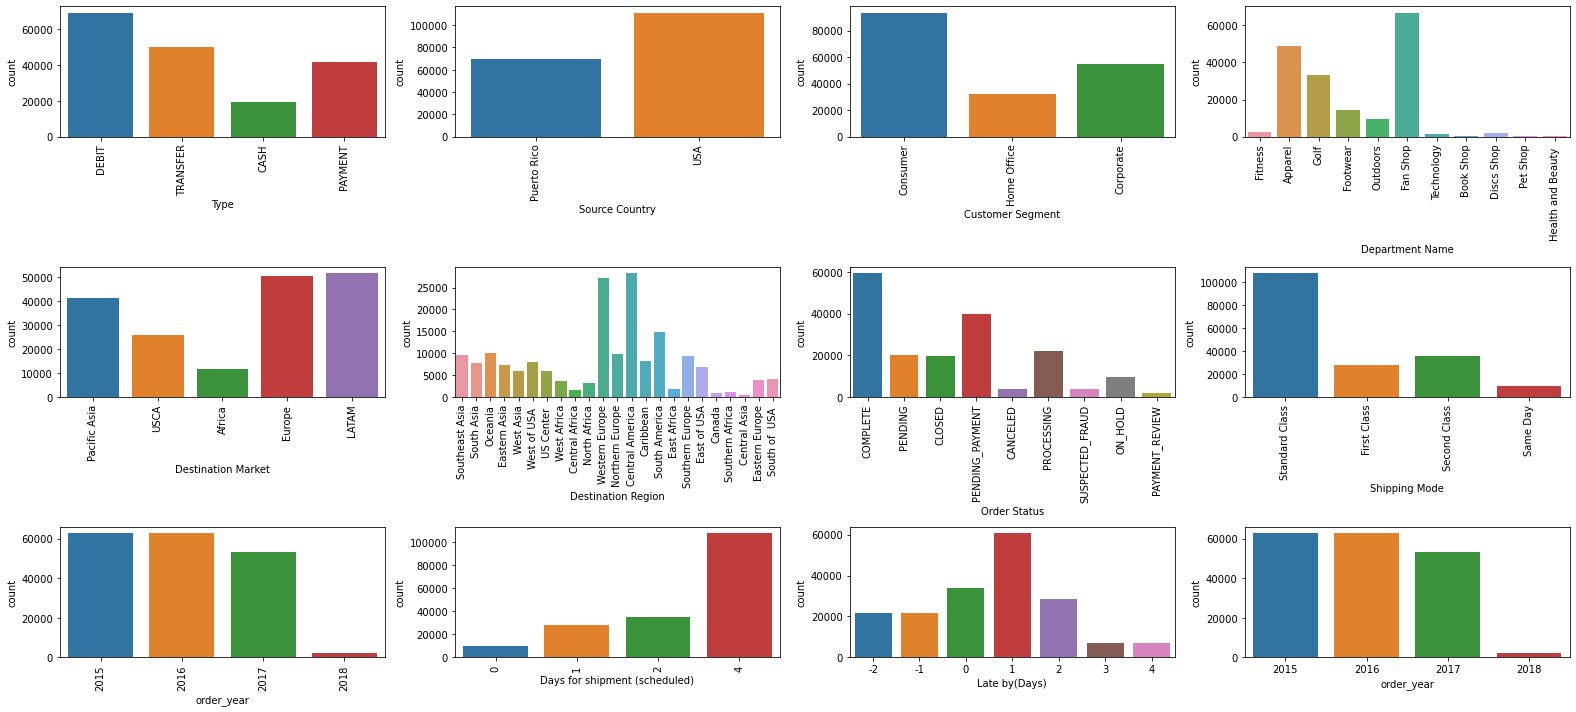

In [496]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df_obj.columns,range(1,11)):
    plt.subplot(3,4,j)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
plt.subplot(3,4,11)
sns.countplot(df['Late by(Days)'])
plt.subplot(3,4,12)
sns.countplot(df['order_year'])
plt.tight_layout()
plt.show()

In [480]:
df_obj.drop(['Delivery Status','Late_delivery_risk'],1,inplace=True)

In [482]:
df_obj[['order_year','Days for shipment (scheduled)','order_month']]=df[['order_year','Days for shipment (scheduled)','order_month']]

In [484]:
df_obj.head(1)

,Type,Source Country,Customer Segment,Department Name,Destination Market,Destination Region,Order Status,Shipping Mode,order_year,Days for shipment (scheduled),order_month
0,DEBIT,Puerto Rico,Consumer,Fitness,Pacific Asia,Southeast Asia,COMPLETE,Standard Class,2018,4,1


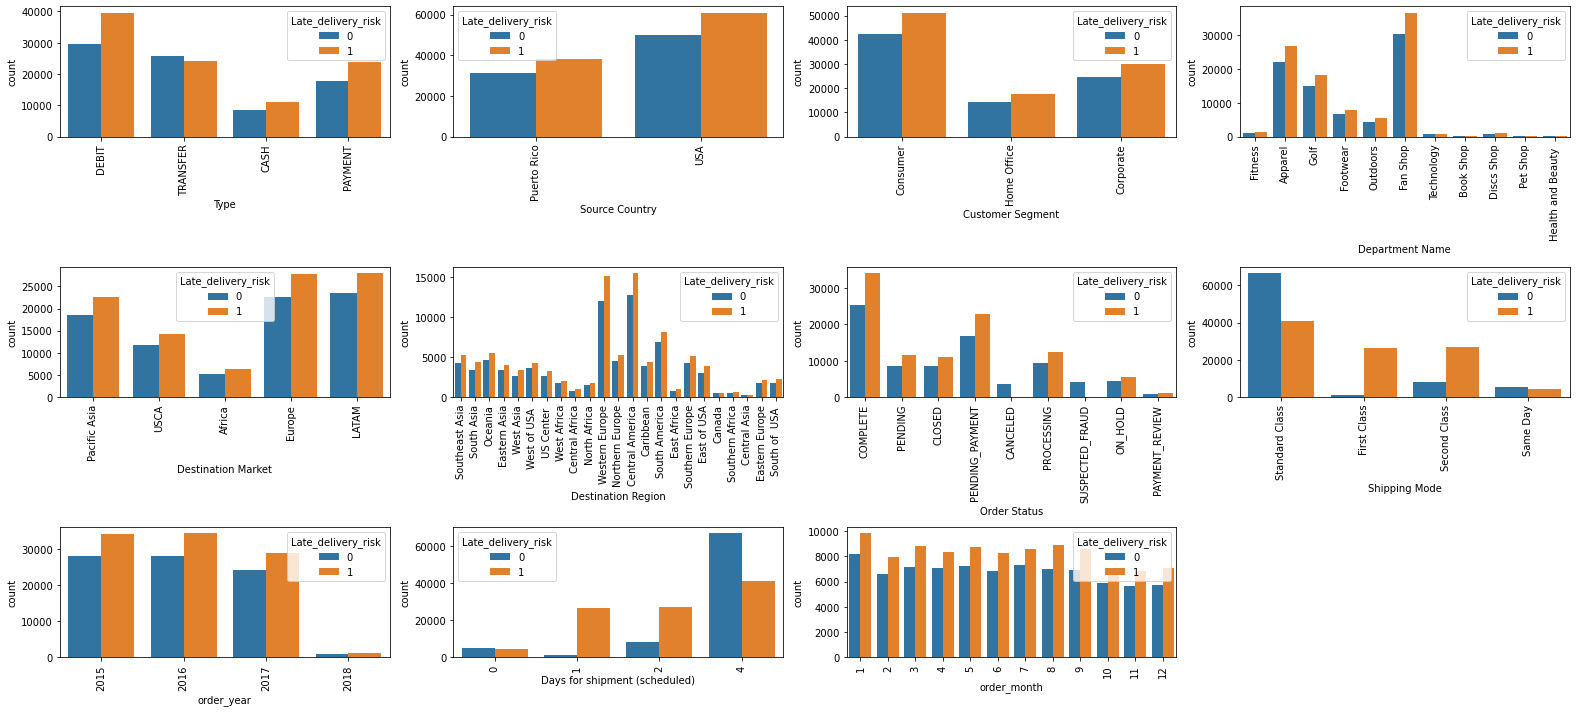

In [486]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df_obj.columns,range(1,12)):
    plt.subplot(3,4,j)
    sns.countplot(df[i],hue=df['Late_delivery_risk'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [492]:
df_num=df.select_dtypes(exclude='object')

In [493]:
df_num.head(1)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,3,4,91.25,314.640015,13.11,0.04,327.75,0.29,1,327.75,327.75,-1,2018,1,2,22,2018,2,5,22


In [499]:
df_num.drop(['Days for shipping (real)','Days for shipment (scheduled)','Late by(Days)','shipping_year','shipping_month',
             'shipping_week_day','shipping_hour'],1,inplace=True)

In [500]:
len(df_num.columns)

13

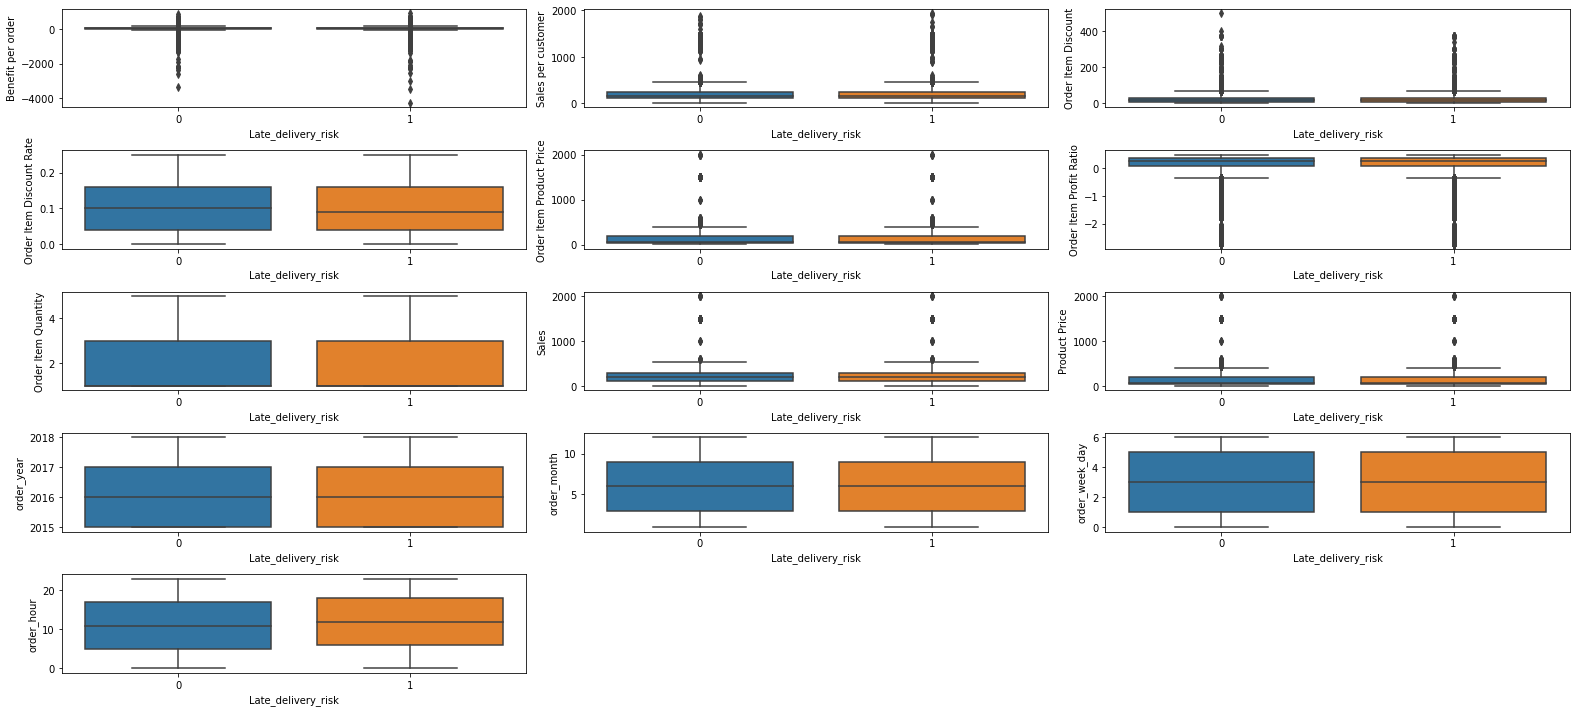

In [502]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df_num.columns,range(1,21)):
    plt.subplot(5,3,j)
    sns.boxplot(x=df['Late_delivery_risk'],y=df[i])
plt.tight_layout()
plt.show()

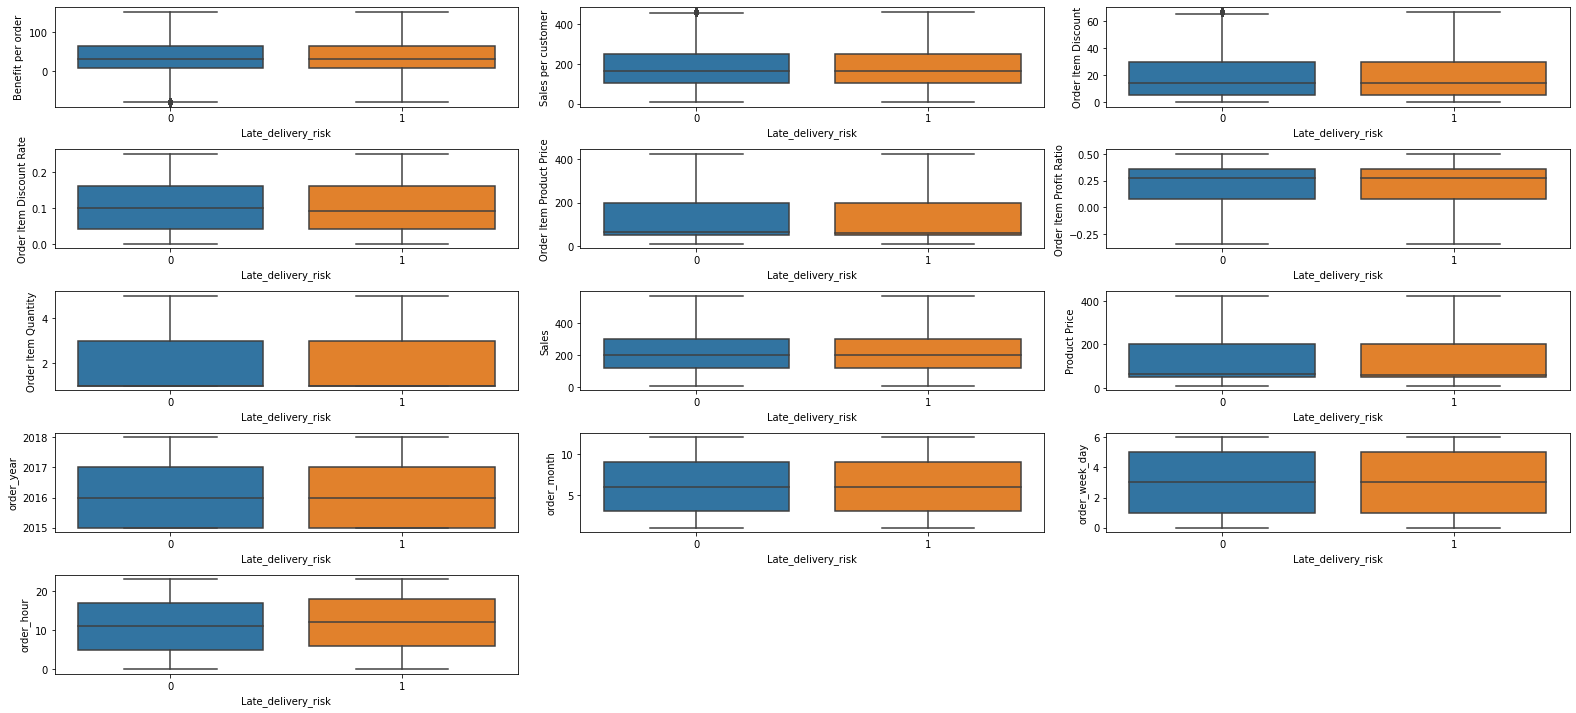

In [507]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df_num.columns,range(1,21)):
    plt.subplot(5,3,j)
    sns.boxplot(x=df['Late_delivery_risk'],y=x[i])
plt.tight_layout()
plt.show()

In [ ]:
#for i,j in zip(df.select_dtypes(exclude='object').columns,range(1,len(df2_num.columns)+1)):
 #   plt.subplot(3,4,j)
  #  sns.scatterplot(df2[i],df2['Sales'])
   # plt.tight_layout()
    #plt.show()

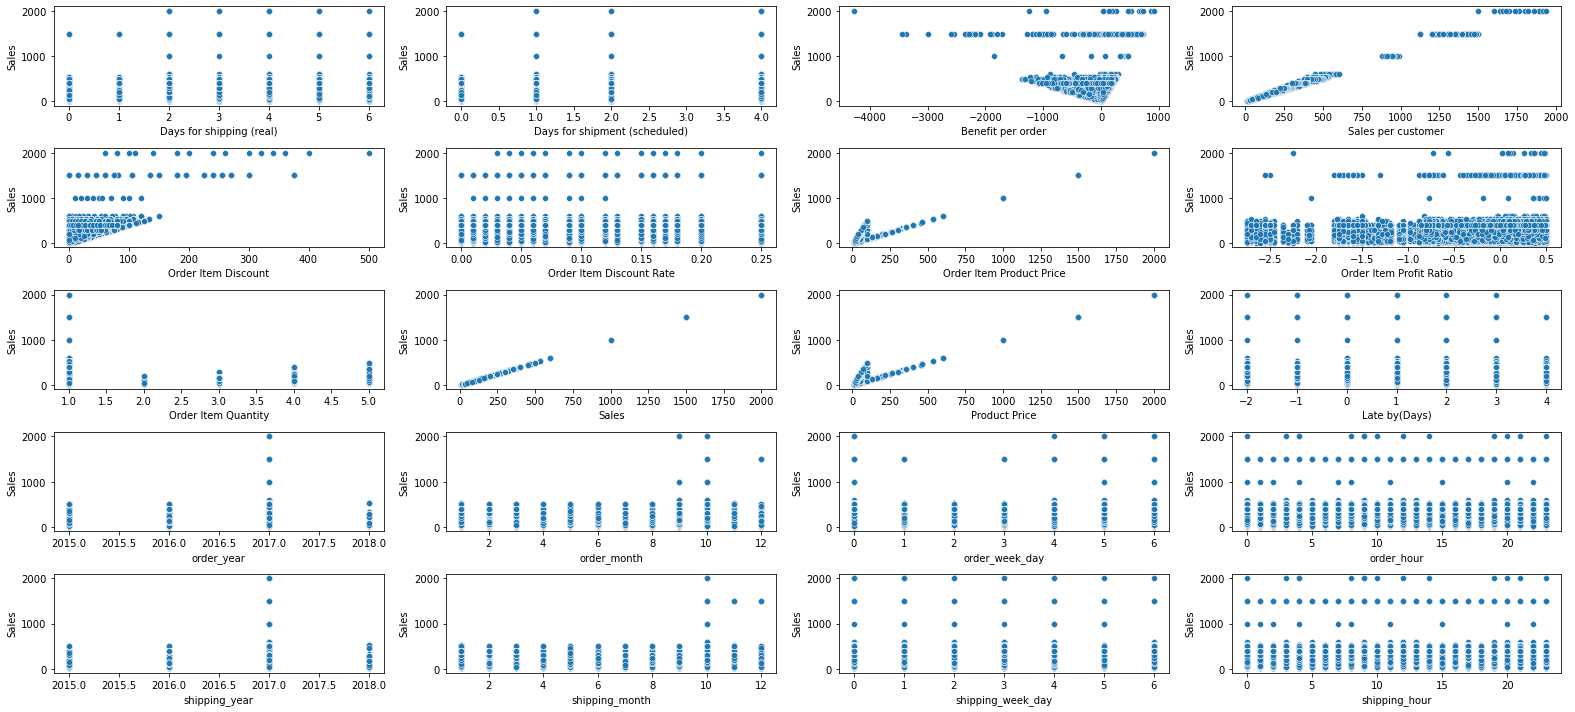

In [473]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df.select_dtypes(exclude='object').columns,range(1,21)):
    plt.subplot(5,4,j)
    sns.scatterplot(df[i],df['Sales'])
plt.tight_layout()
plt.show()

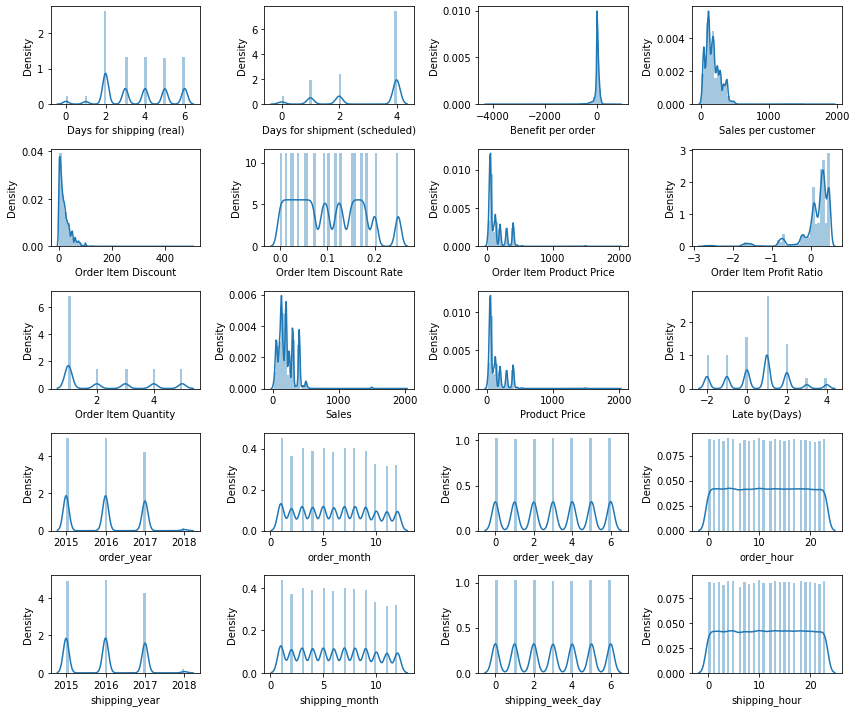

In [456]:
plt.rcParams['figure.figsize']=[22,10]
for i,j in zip(df.select_dtypes(exclude='object').columns,range(1,21)):
    plt.subplot(5,4,j)
    sns.distplot(df[i])
plt.tight_layout()
plt.show()

In [487]:
len(df.select_dtypes(exclude='object').columns)

20

In [474]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1,2018,1,2,22,2018,2,5,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1,2018,1,5,12,2018,1,3,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,USA,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0,2018,1,5,12,2018,1,2,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,USA,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,-1,2018,1,5,11,2018,1,1,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,-2,2018,1,5,11,2018,1,0,11


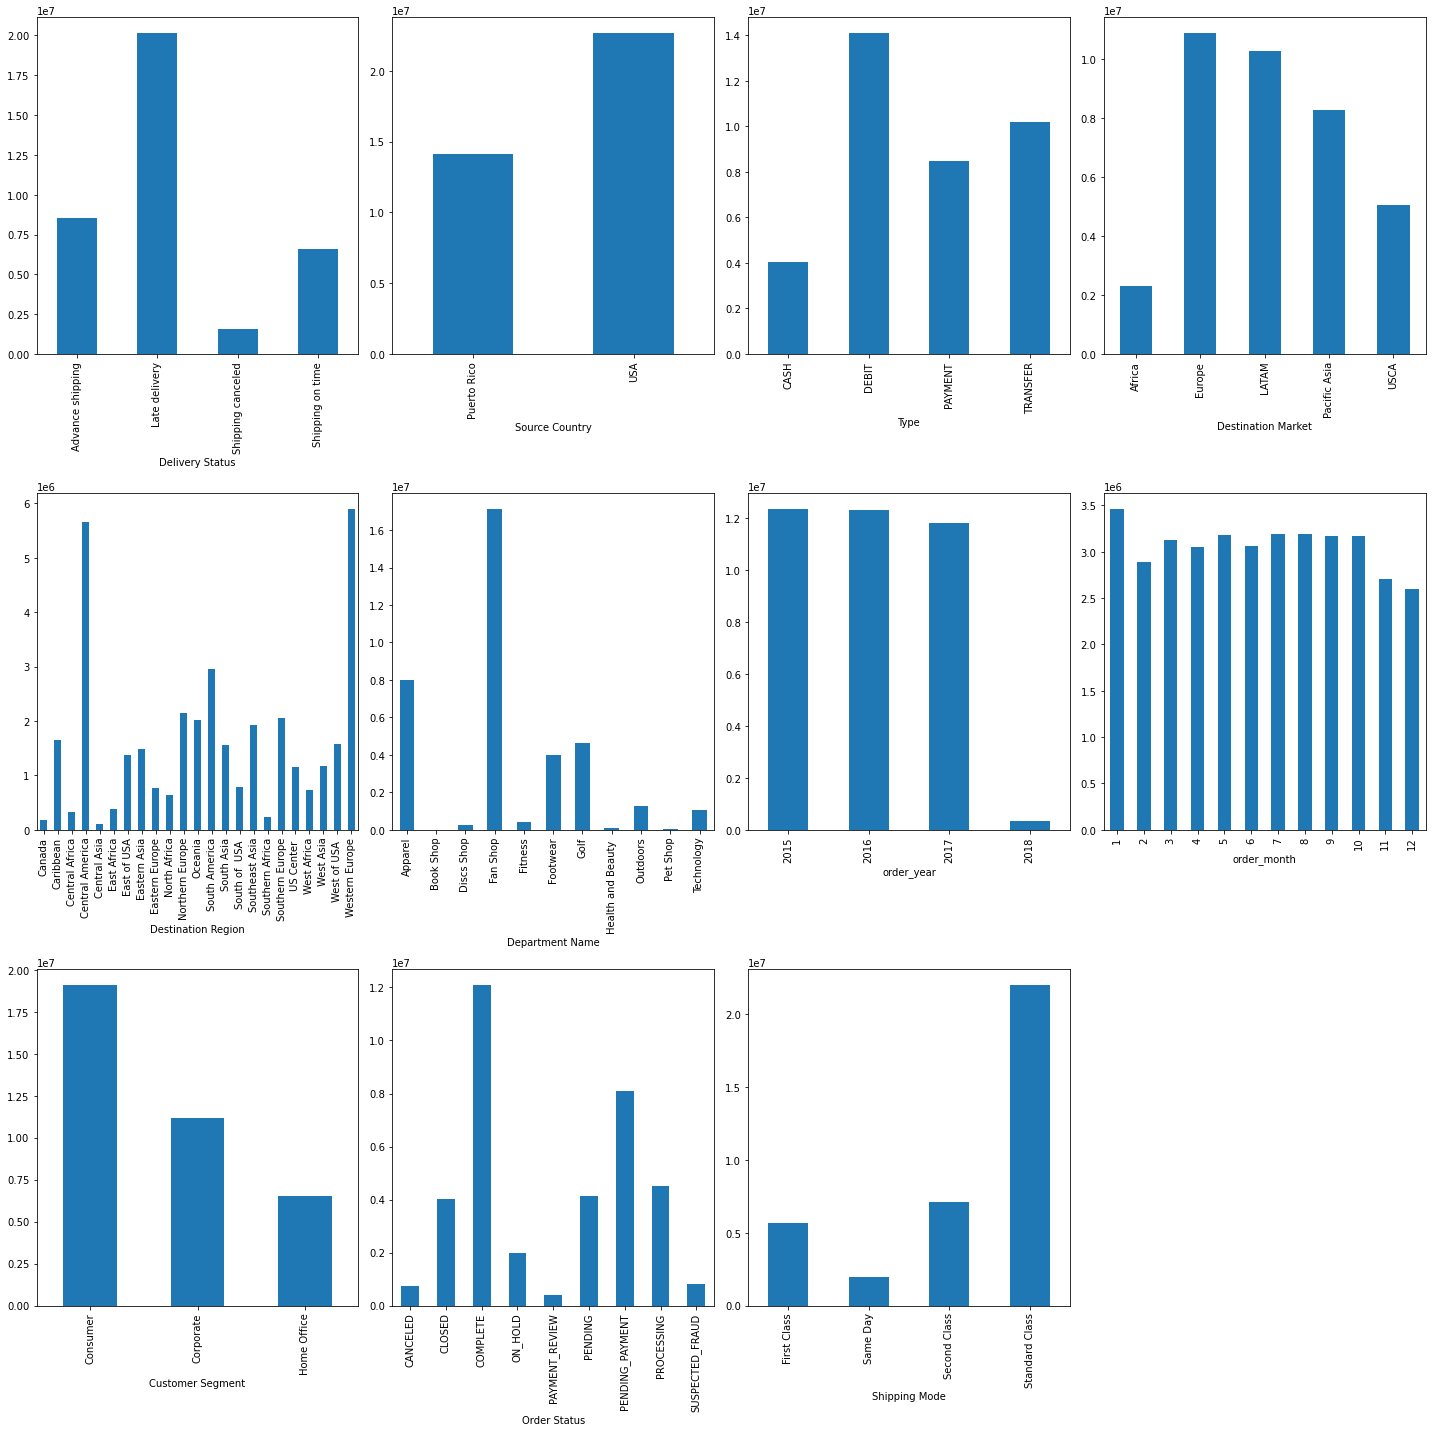

In [476]:
plt.rcParams['figure.figsize']=[20,20]
l=df[['Delivery Status','Source Country','Type','Destination Market','Destination Region','Department Name','order_year','order_month','Customer Segment',
  'Order Status','Shipping Mode']]
for i,j in zip(l,range(1,12)):
    plt.subplot(3,4,j)
    df.groupby(i)['Sales'].sum().plot(kind='bar')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

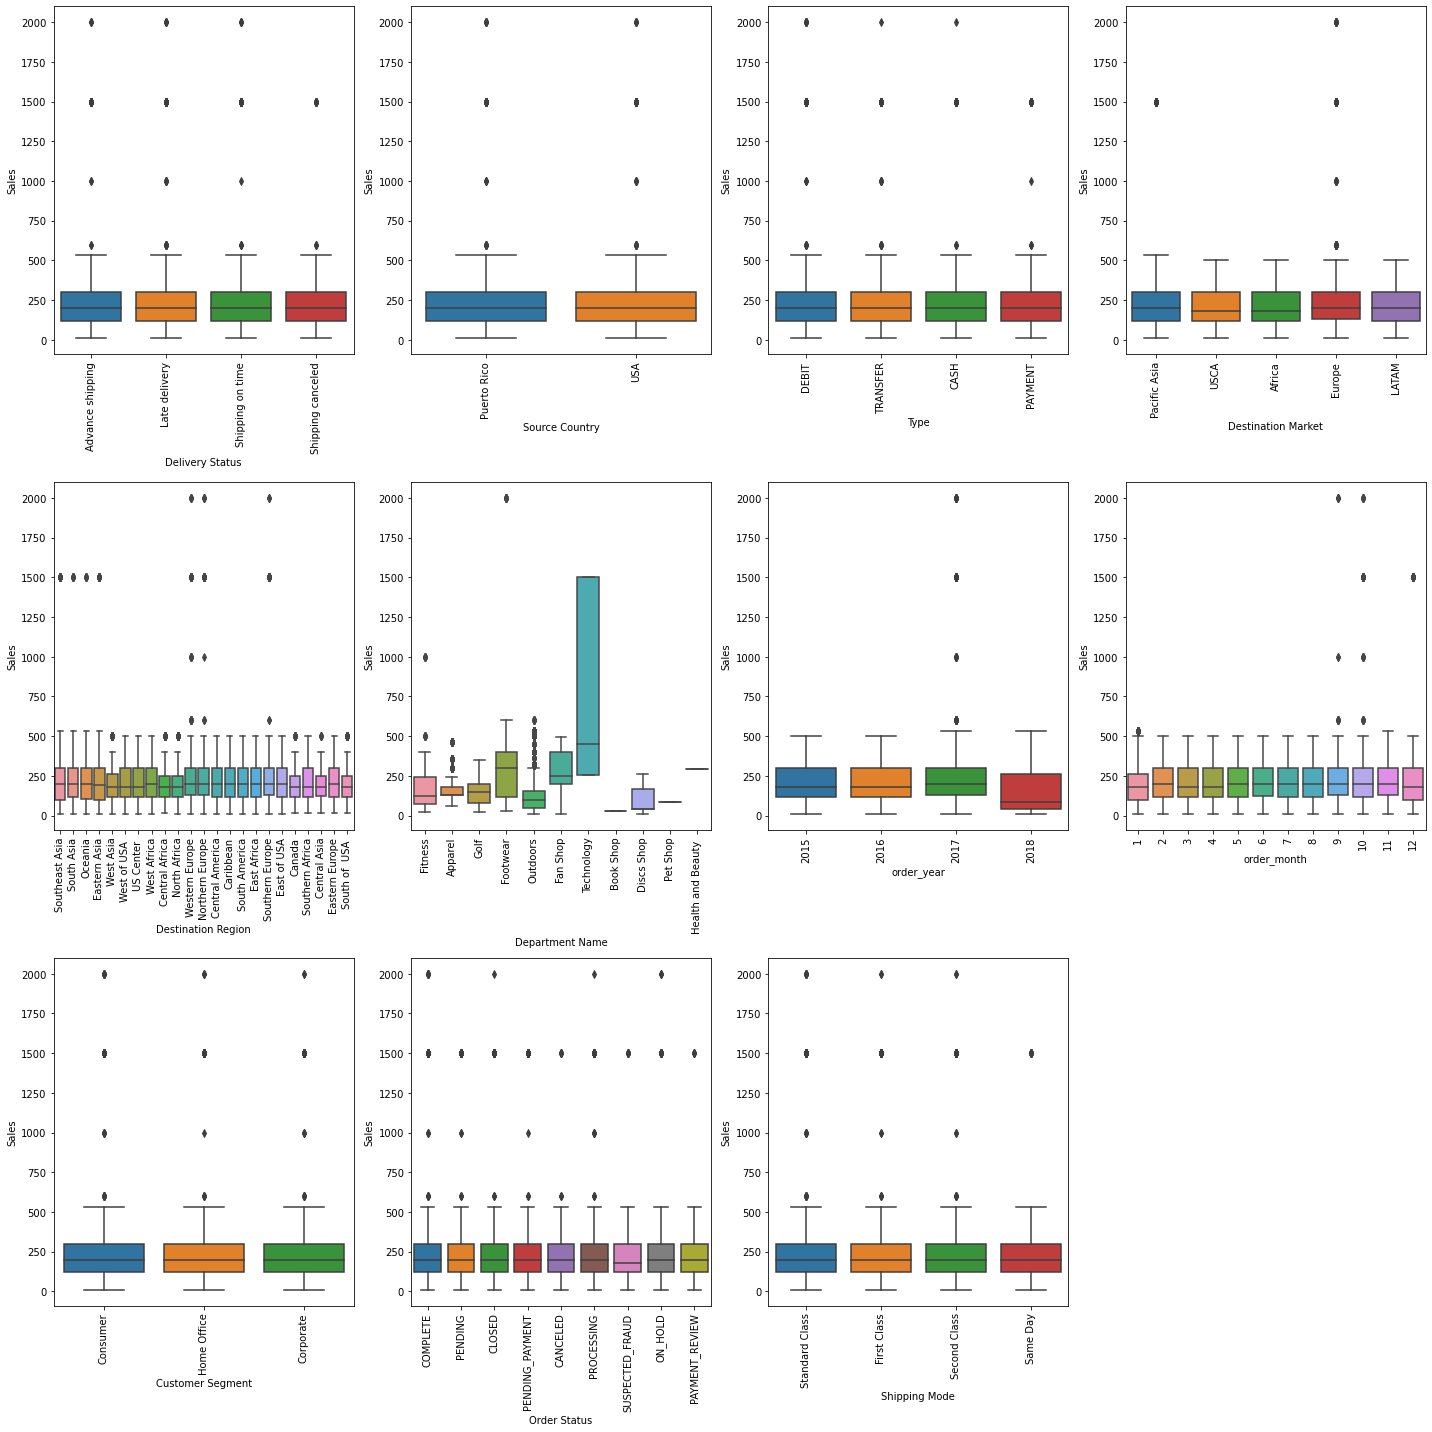

In [514]:
plt.rcParams['figure.figsize']=[20,20]
l=df[['Delivery Status','Source Country','Type','Destination Market','Destination Region','Department Name','order_year','order_month','Customer Segment',
  'Order Status','Shipping Mode']]
for i,j in zip(l,range(1,12)):
    plt.subplot(3,4,j)
    #df.groupby(i)['Sales'].sum().plot(kind='box')
    sns.boxplot(df[i],df['Sales'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

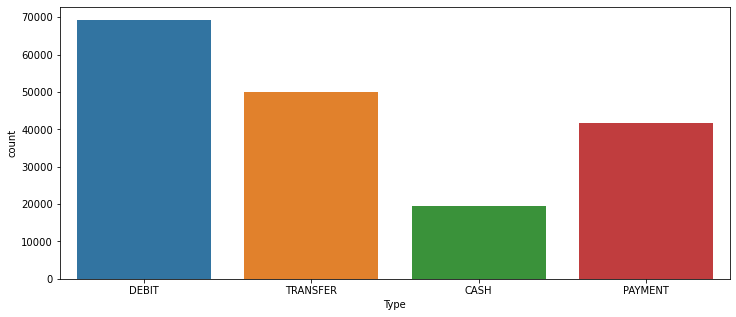

In [155]:
sns.countplot(df['Type'])
plt.show()

In [ ]:
# we can see that most number of payment were done via Debt Type followed by Transfer , cash being the least prefered one

<AxesSubplot:xlabel='Days for shipping (real)', ylabel='Density'>

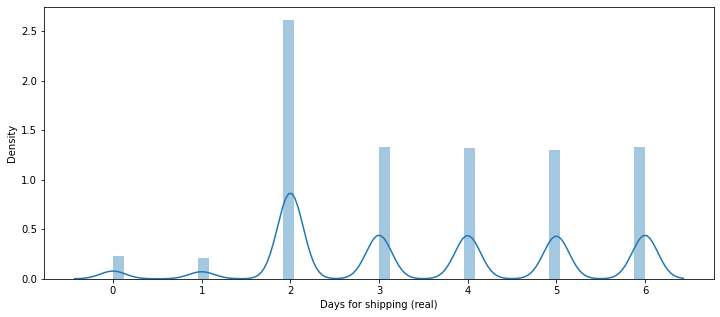

In [157]:
sns.distplot(df['Days for shipping (real)'])

In [ ]:
# most of the shipments are delivered in 2 days

<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='Density'>

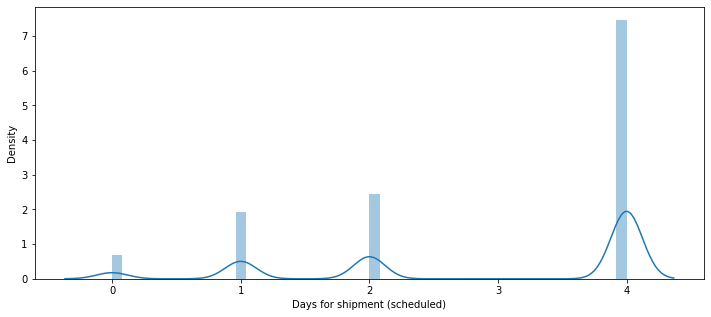

In [159]:
sns.distplot(df['Days for shipment (scheduled)'])

In [160]:
# most of the shipments were scheduled to be delivered in 4 days

<AxesSubplot:xlabel='Benefit per order'>

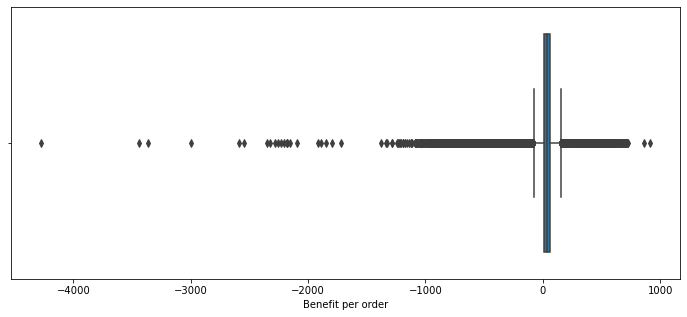

In [162]:
sns.boxplot(df['Benefit per order'])

In [ ]:
# we can observe that benifit per order ranges from 1000 to -4000 and most of the values being close to 0 

<AxesSubplot:xlabel='Sales per customer'>

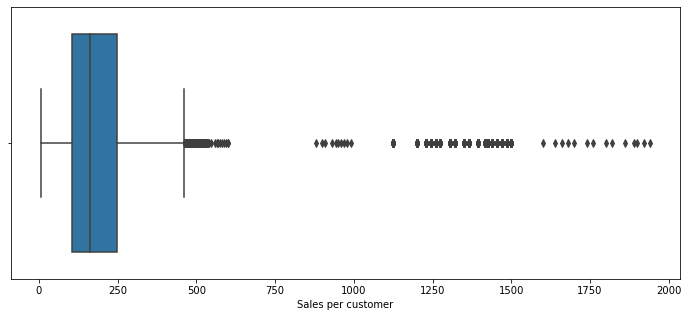

In [163]:
sns.boxplot(df['Sales per customer'])

In [ ]:
# most of the sales per customer values lie between 0 to 500

<AxesSubplot:xlabel='Delivery Status', ylabel='count'>

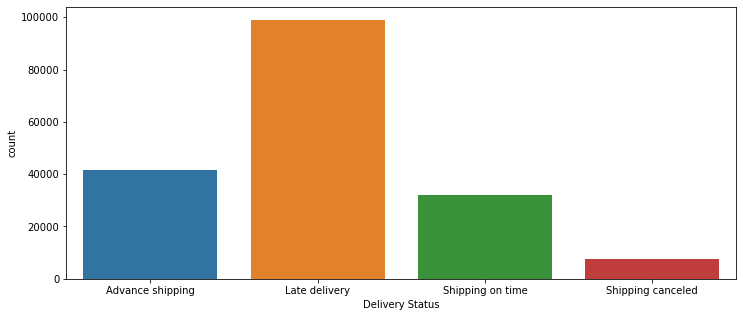

In [165]:
sns.countplot(df['Delivery Status'])

In [166]:
df['Delivery Status'].value_counts(normalize=True)*100

Late delivery        54.829346
Advance shipping     23.039593
Shipping on time     17.835478
Shipping canceled     4.295583
Name: Delivery Status, dtype: float64

In [ ]:
# we can see that 54% of the shipments are late followed by 23% shipments being delivered in advance,
# 4% shipments were canceled

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='count'>

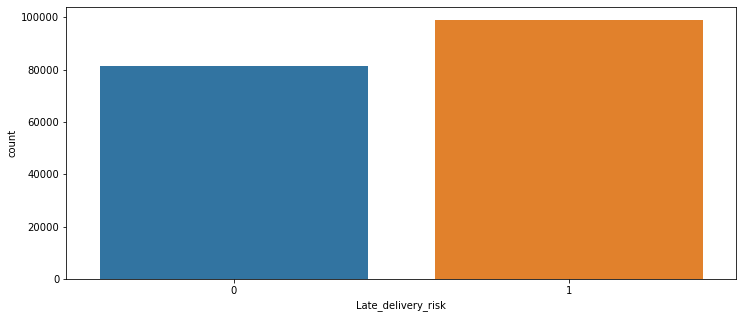

In [167]:
sns.countplot(df['Late_delivery_risk'])

In [168]:
df['Late_delivery_risk'].value_counts(normalize=True)*100

1    54.829346
0    45.170654
Name: Late_delivery_risk, dtype: float64

In [ ]:
# 45% of the shipments are not delivered late

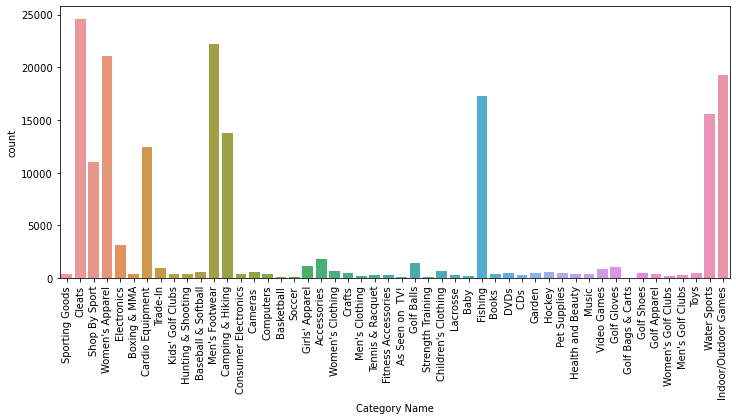

In [284]:
sns.countplot(df['Category Name'])
plt.xticks(rotation=90)
plt.show()

In [173]:
df['Category Name'].value_counts(normalize=True)*100

Cleats                  13.600833
Men's Footwear          12.323903
Women's Apparel         11.653029
Indoor/Outdoor Games    10.690761
Fishing                  9.597753
Water Sports             8.608894
Camping & Hiking         7.605631
Cardio Equipment         6.917584
Shop By Sport            6.084948
Electronics              1.748370
Accessories              0.986089
Golf Balls               0.817125
Girls' Apparel           0.665333
Golf Gloves              0.592762
Trade-In                 0.539579
Video Games              0.464238
Children's Clothing      0.360089
Women's Clothing         0.358981
Baseball & Softball      0.350117
Hockey                   0.340145
Cameras                  0.327958
Toys                     0.293057
Golf Shoes               0.290287
Pet Supplies             0.272560
Garden                   0.268128
DVDs                     0.267574
Crafts                   0.266466
Computers                0.244860
Golf Apparel             0.244306
Hunting & Shoo

In [174]:
# Cleats is the most shipped category of product followed by Mens footwere , womens Apparel and Indoor/outdoor games

In [175]:
df['Source City'].value_counts(normalize=True)*100

Caguas         36.988328
Chicago         2.152223
Los Angeles     1.892405
Brooklyn        1.890190
New York        1.006033
                 ...    
Bartlett        0.013850
Malden          0.012188
Ponce           0.012188
Freehold        0.007202
CA              0.001662
Name: Source City, Length: 563, dtype: float64

In [176]:
df['Source City'].nunique()

563

In [ ]:
# most shipments are sourced from city caguas, followed by chicago 
# there are a total of 563 unique source cities 

In [457]:
df['Source Country'].replace('EE. UU.','USA',inplace=True)

In [183]:
df['Source Country'].value_counts(normalize=True)*100

USA            61.569655
Puerto Rico    38.430345
Name: Source Country, dtype: float64

<AxesSubplot:xlabel='Source Country', ylabel='count'>

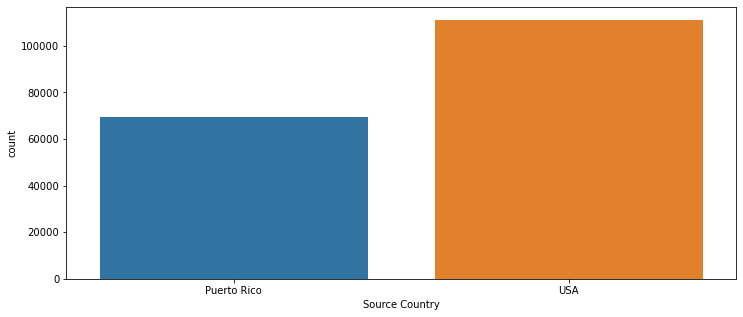

In [182]:
sns.countplot(df['Source Country'])

In [ ]:
# products are sourced from 2 countries, USA being the source of 61% of products 

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

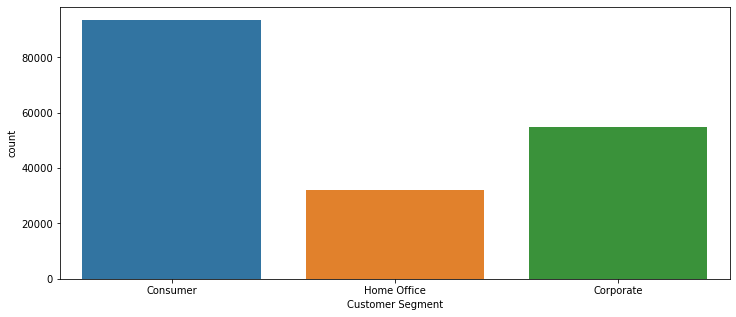

In [184]:
sns.countplot(df['Customer Segment'])

In [185]:
df['Customer Segment'].value_counts(normalize=True)*100

Consumer       51.799059
Corporate      30.349951
Home Office    17.850990
Name: Customer Segment, dtype: float64

In [ ]:
# 

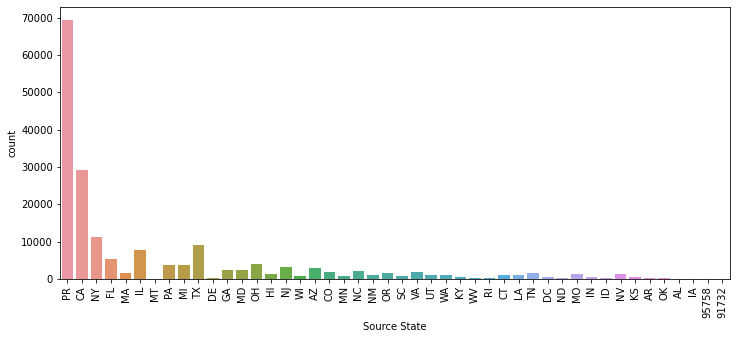

In [203]:
sns.countplot(df['Source State'])
plt.xticks(rotation=90)
plt.show()

In [190]:
(df['Source State'].value_counts(normalize=True)*100).head()

PR    38.430345
CA    16.187933
NY     6.274964
TX     5.042352
IL     4.226889
Name: Source State, dtype: float64

In [191]:
df['Source State'].nunique()

46

In [ ]:
#

In [192]:
df['Department Name'].nunique()

11

<AxesSubplot:xlabel='Department Name', ylabel='count'>

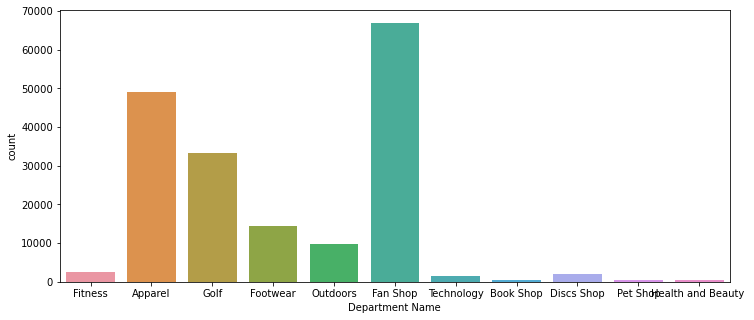

In [193]:
sns.countplot(df['Department Name'])

In [ ]:
#

In [194]:
df['Destination Market'].nunique()

5

<AxesSubplot:xlabel='Destination Market', ylabel='count'>

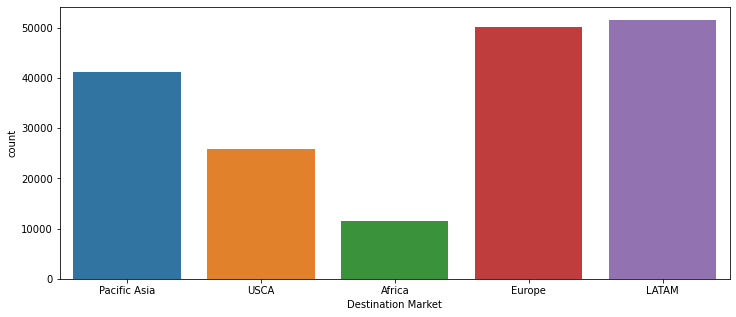

In [195]:
sns.countplot(df['Destination Market'])

In [ ]:
#

In [197]:
df['Destination City'].nunique()

3597

In [199]:
(df['Destination City'].value_counts(normalize=True)*100).head(10)

Santo Domingo    1.224856
New York City    1.219870
Los Angeles      1.022098
Tegucigalpa      0.987751
Managua          0.931799
Mexico City      0.822111
Manila           0.764496
Philadelphia     0.721286
San Francisco    0.718516
London           0.657578
Name: Destination City, dtype: float64

In [ ]:
#

In [200]:
df['Destination Country'].nunique()

164

In [201]:
(df['Destination Country'].value_counts(normalize=True)*100).head(10)

Estados Unidos    13.760934
Francia            7.324761
México             7.297062
Alemania           5.297738
Australia          4.707192
Brasil             4.424661
Reino Unido        4.045183
China              3.189279
Italia             2.763267
India              2.649146
Name: Destination Country, dtype: float64

In [ ]:
#

<AxesSubplot:xlabel='Order Item Discount', ylabel='Density'>

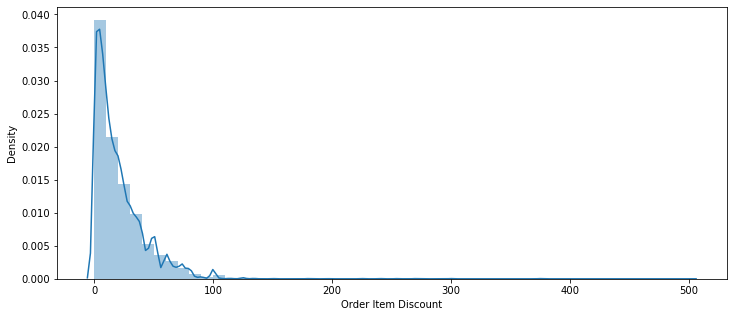

In [ ]:
#

<AxesSubplot:xlabel='Order Item Discount Rate', ylabel='Density'>

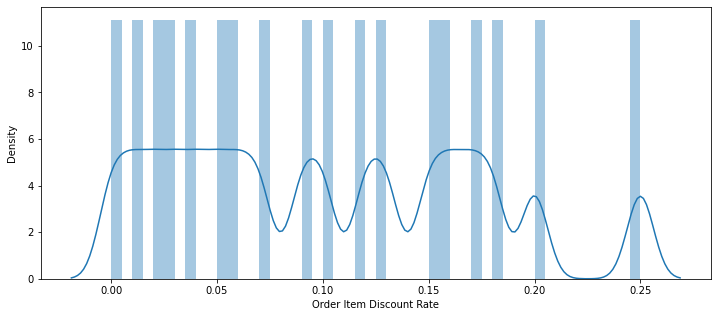

In [206]:
sns.distplot(df['Order Item Discount Rate'])

In [ ]:
#

<AxesSubplot:xlabel='Order Item Product Price', ylabel='Density'>

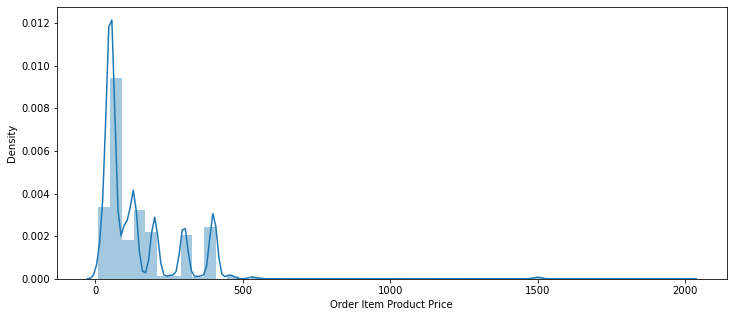

In [208]:
sns.distplot(df['Order Item Product Price'])

In [ ]:
#

<AxesSubplot:xlabel='Order Item Profit Ratio', ylabel='Density'>

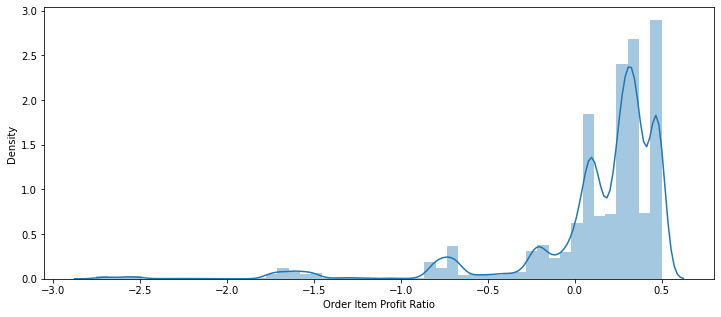

In [209]:
sns.distplot(df['Order Item Profit Ratio'])

In [ ]:
#

<AxesSubplot:xlabel='Order Item Quantity', ylabel='Density'>

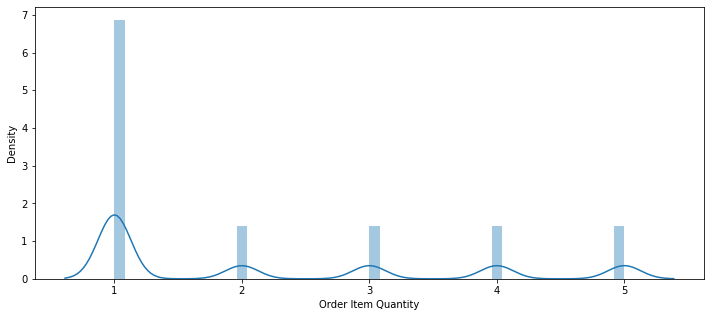

In [210]:
sns.distplot(df['Order Item Quantity'])

In [ ]:
#

<AxesSubplot:xlabel='Sales', ylabel='Density'>

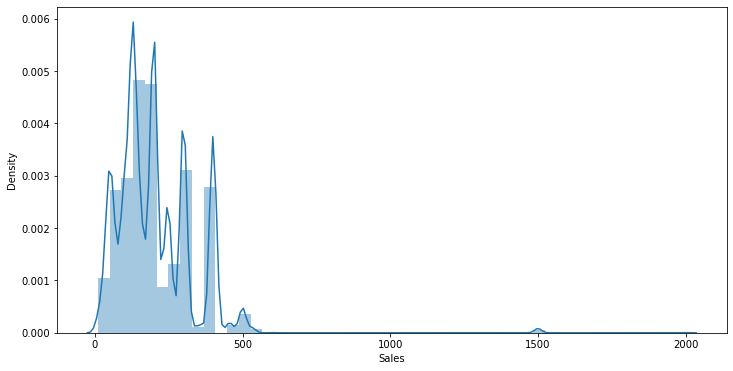

In [146]:
sns.distplot(df['Sales'])

In [ ]:
#

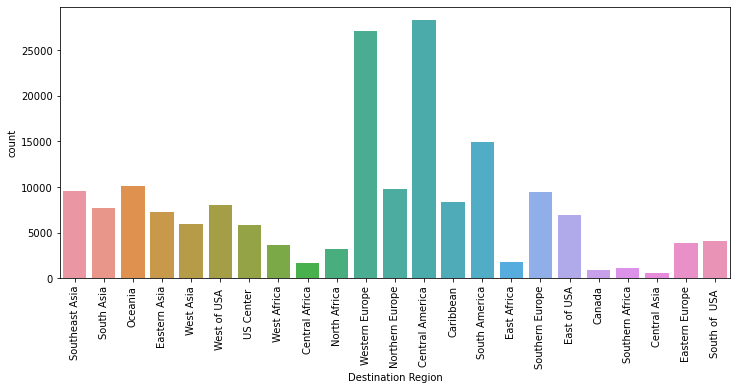

In [215]:
sns.countplot(df['Destination Region'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

In [216]:
df['Destination State'].nunique()

1089

In [217]:
(df['Destination State'].value_counts(normalize=True)*100).head(10)

Inglaterra                     3.723873
California                     2.751079
Isla de Francia                2.537241
Renania del Norte-Westfalia    1.829251
San Salvador                   1.692418
Nueva York                     1.525115
Distrito Federal               1.417642
Texas                          1.355042
Nueva Gales del Sur            1.312939
Santo Domingo                  1.224856
Name: Destination State, dtype: float64

In [ ]:
#

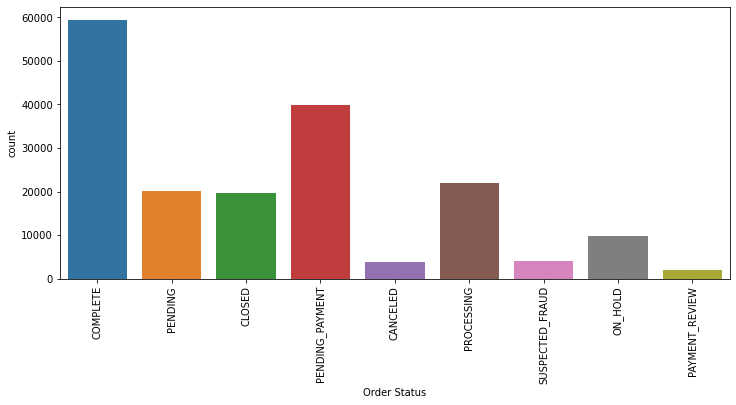

In [220]:
sns.countplot(df['Order Status'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

In [221]:
df['Product Name'].nunique()

118

In [222]:
(df['Product Name'].value_counts(normalize=True)*100).head(10)

Perfect Fitness Perfect Rip Deck                 13.580890
Nike Men's CJ Elite 2 TD Football Cleat          12.323903
Nike Men's Dri-FIT Victory Golf Polo             11.653029
O'Brien Men's Neoprene Life Vest                 10.690761
Field & Stream Sportsman 16 Gun Fire Safe         9.597753
Pelican Sunstream 100 Kayak                       8.586734
Diamondback Women's Serene Classic Comfort Bi     7.605631
Nike Men's Free 5.0+ Running Shoe                 6.741417
Under Armour Girls' Toddler Spine Surge Runni     5.881636
Fighting video games                              0.464238
Name: Product Name, dtype: float64

In [ ]:
#

<AxesSubplot:xlabel='Product Price', ylabel='Density'>

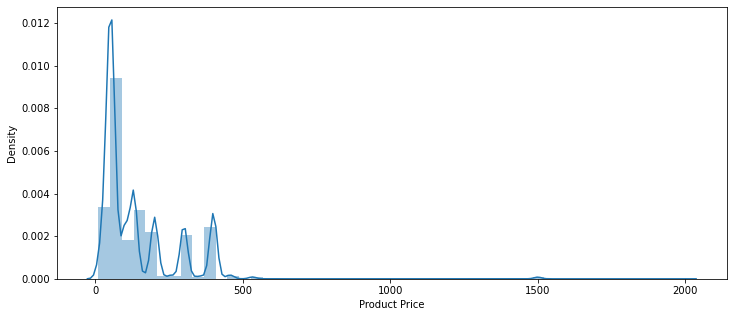

In [223]:
sns.distplot(df['Product Price'])

In [ ]:
#

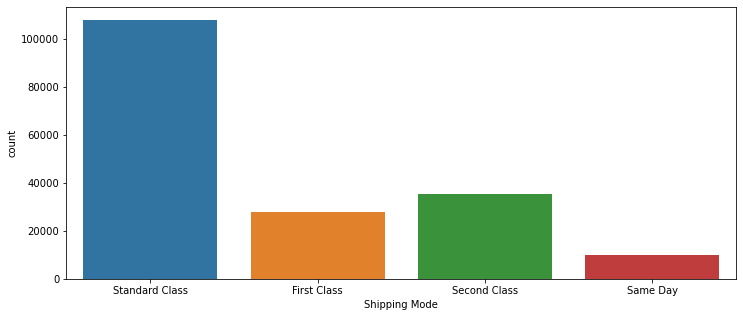

In [225]:
sns.countplot(df['Shipping Mode'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

<AxesSubplot:xlabel='Late by(Days)'>

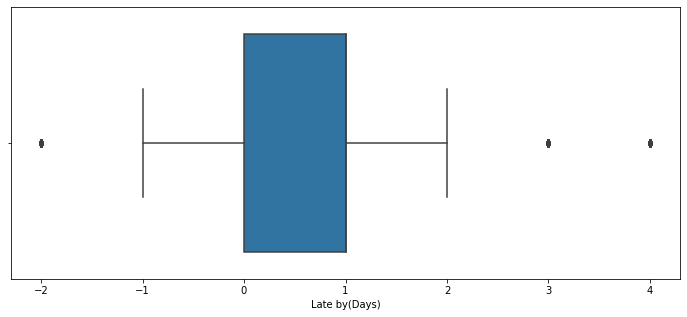

In [227]:
sns.boxplot(df['Late by(Days)'])

In [229]:
df['Late by(Days)'].value_counts(normalize=True)*100

 1    33.595737
 0    18.698029
 2    15.908726
-1    12.020874
-2    12.001485
 3     3.906687
 4     3.868462
Name: Late by(Days), dtype: float64

In [ ]:
#

<AxesSubplot:xlabel='order_year', ylabel='count'>

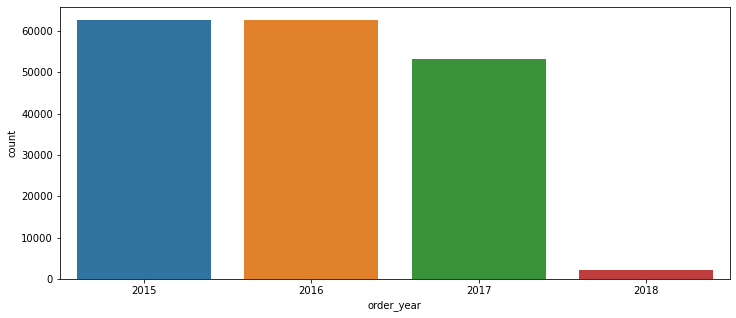

In [231]:
sns.countplot(df['order_year'])

In [ ]:
#

<AxesSubplot:xlabel='order_month', ylabel='count'>

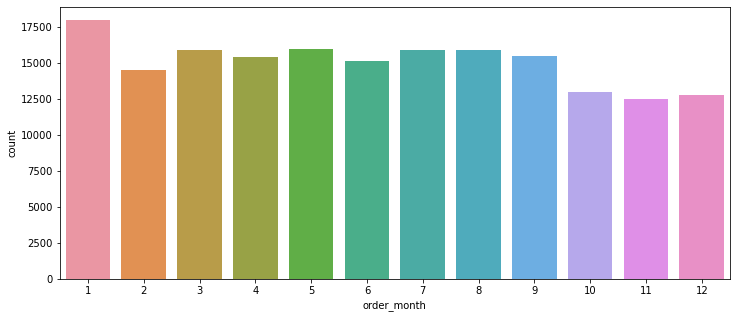

In [232]:
sns.countplot(df['order_month'])

In [ ]:
#

<AxesSubplot:xlabel='order_week_day', ylabel='count'>

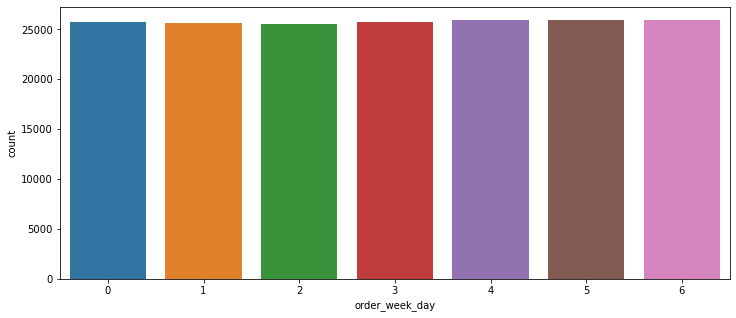

In [233]:
sns.countplot(df['order_week_day'])

In [234]:
df['order_week_day'].value_counts(normalize=True)*100

6    14.373639
4    14.362006
5    14.348156
0    14.285002
3    14.265059
1    14.192487
2    14.173651
Name: order_week_day, dtype: float64

In [ ]:
#

### Outlier Treatment

In [505]:
x=df.copy()
for i in x.select_dtypes(exclude='object').columns:
    IQR=x[i].quantile(0.75)-x[i].quantile(0.25)
    UL=x[i].quantile(0.75)+(IQR*1.5)
    LL=x[i].quantile(0.25)-(IQR*1.5)
    x[i][x[i]>UL]=UL
    x[i][x[i]<LL]=LL
x.drop(['Delivery Status','Days for shipping (real)','Late_delivery_risk'],axis=1,inplace=True)
    
x.head()

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,DEBIT,4,91.250000,314.640015,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1.0,2018,1,2,22,2018,2,5,22
1,TRANSFER,4,-79.700005,311.359985,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.34,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1.0,2018,1,5,12,2018,1,3,12
2,CASH,4,-79.700005,309.720001,Sporting Goods,San Jose,USA,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.34,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0.0,2018,1,5,12,2018,1,2,12
3,DEBIT,4,22.860001,304.809998,Sporting Goods,Los Angeles,USA,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,-1.0,2018,1,5,11,2018,1,1,11
4,PAYMENT,4,134.210007,298.250000,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,-1.5,2018,1,5,11,2018,1,0,11


## Bivariate Analaysis of Numerical columns with respect to Target Variable

<AxesSubplot:xlabel='Type', ylabel='count'>

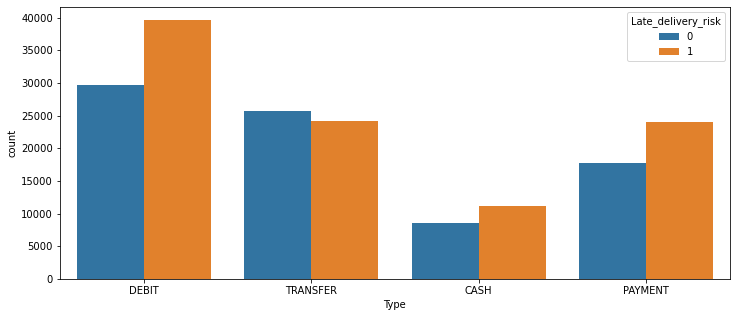

In [237]:
sns.countplot(df['Type'],hue=df['Late_delivery_risk'])

In [ ]:
#

<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='count'>

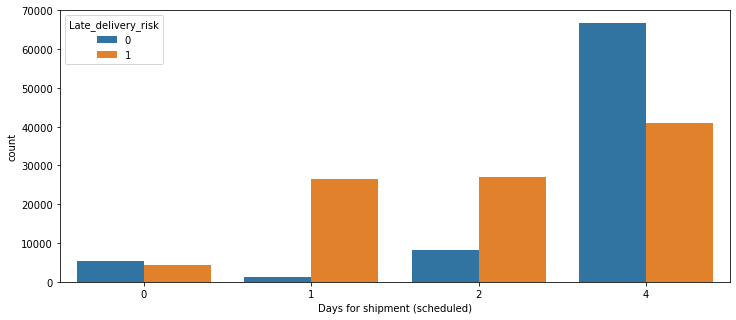

In [242]:
sns.countplot(hue=df['Late_delivery_risk'],x=df['Days for shipment (scheduled)'])

In [ ]:
#

In [279]:
#sns.boxplot(x=df['Late_delivery_risk'],y=df['Benefit per order'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Benefit per order'>

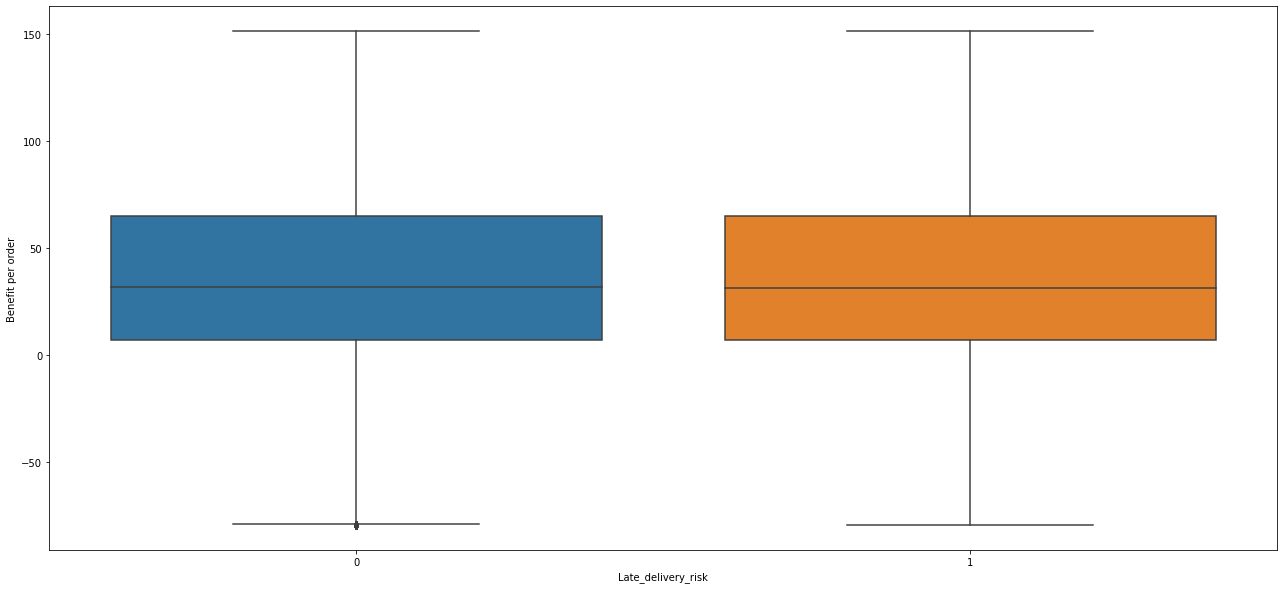

In [506]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Benefit per order'])

In [264]:
#

In [280]:
#sns.boxplot(x=df['Late_delivery_risk'],y=df['Sales per customer'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales per customer'>

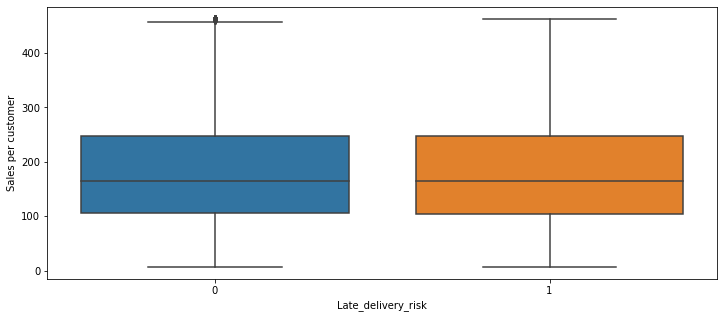

In [268]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Sales per customer'])

In [278]:
#for i,j in zip(x.columns,range(1,41)):
 #   if df[i].dtype=='O':
  #      plt.subplot(4,10,j)
   #     sns.countplot(hue=df['Late_delivery_risk'],x=df[i])
    #else:
     #   plt.subplot(4,10,j)
      #  sns.boxplot(x=df['Late_delivery_risk'],y=x[i])        

#plt.show()

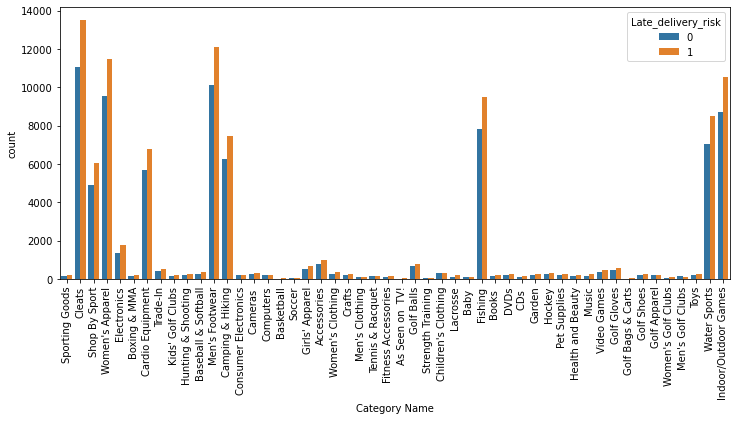

In [282]:
sns.countplot(df['Category Name'],hue=df['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

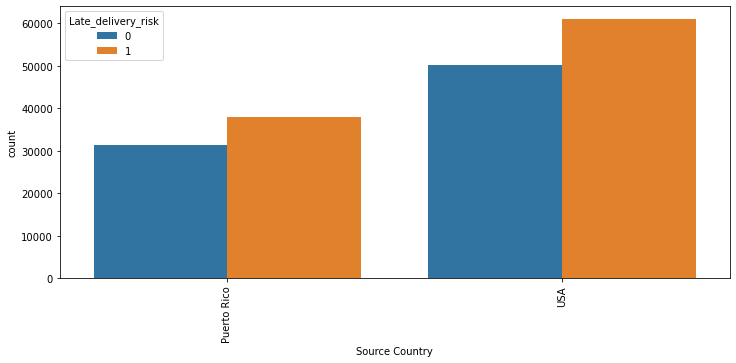

In [286]:
sns.countplot(df['Source Country'],hue=df['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

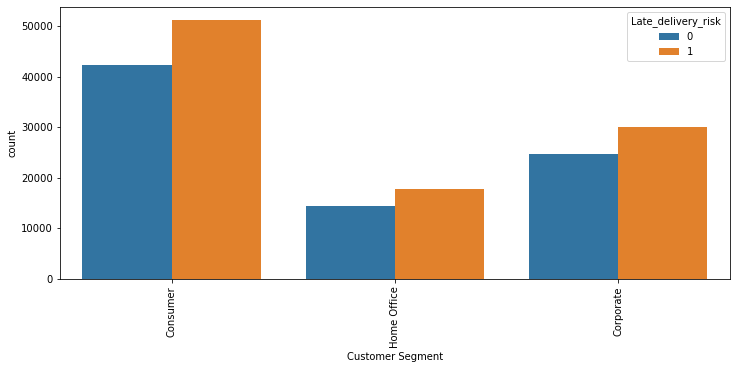

In [287]:
sns.countplot(df['Customer Segment'],hue=df['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

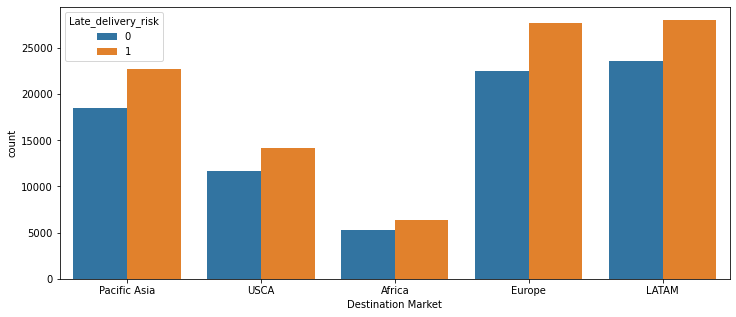

In [302]:
sns.countplot(df['Destination Market'],hue=df['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount'>

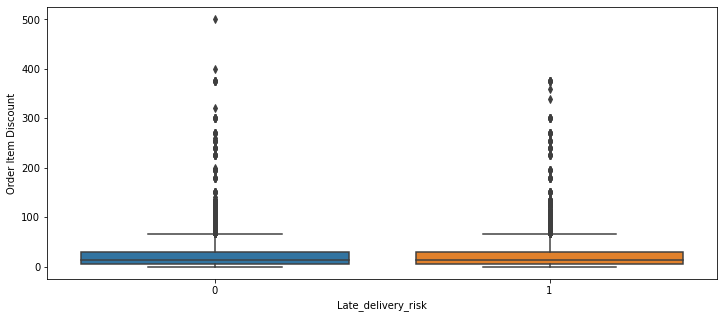

In [294]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Order Item Discount'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount'>

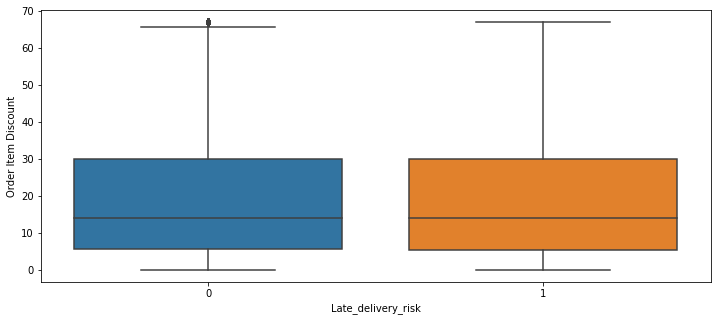

In [295]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Order Item Discount'])

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Discount Rate'>

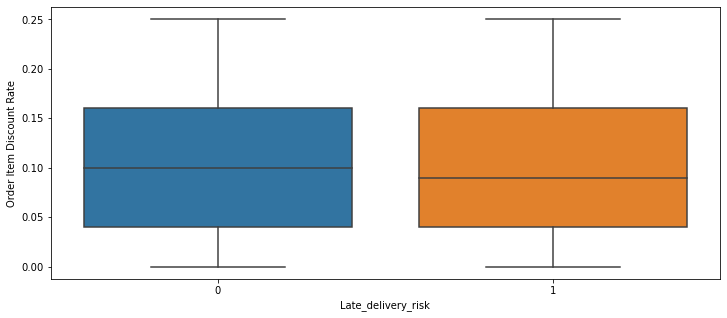

In [293]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Order Item Discount Rate'])

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Product Price'>

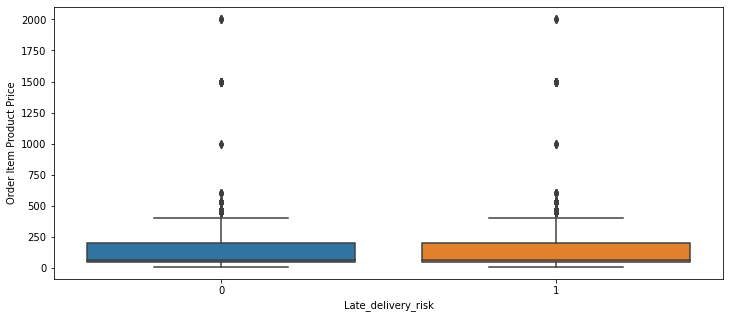

In [292]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Order Item Product Price'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Product Price'>

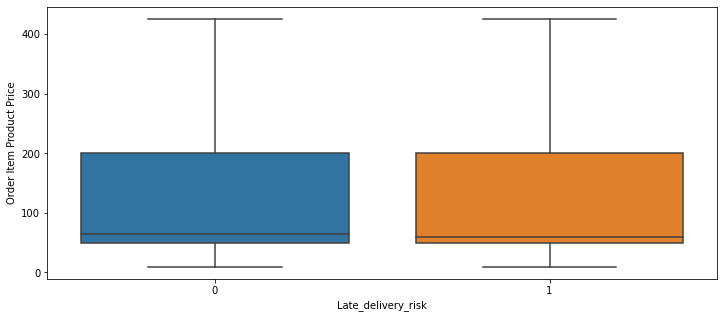

In [296]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Order Item Product Price'])

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Profit Ratio'>

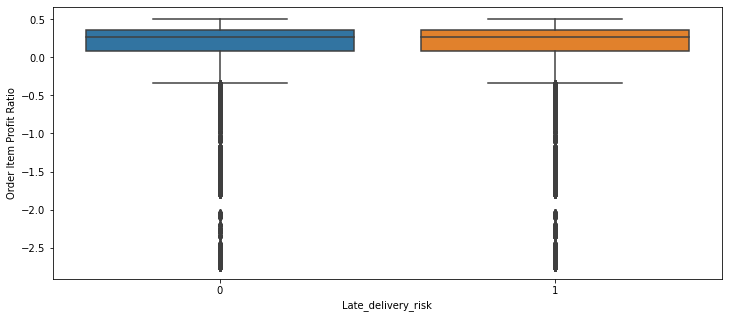

In [298]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Order Item Profit Ratio'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Profit Ratio'>

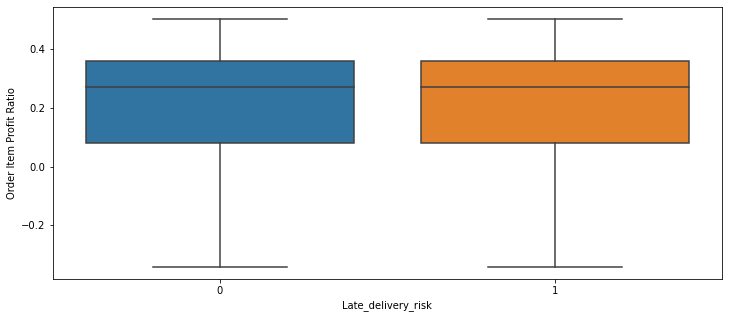

In [297]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Order Item Profit Ratio'])

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Order Item Quantity'>

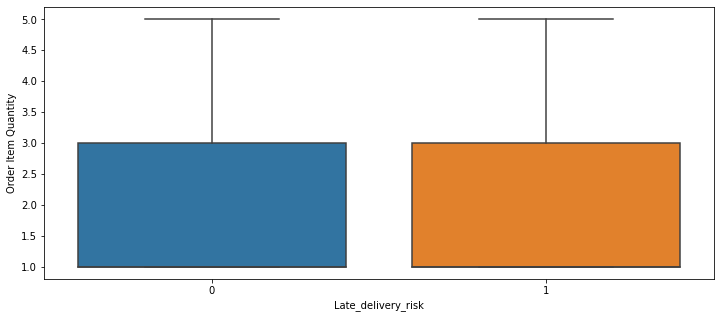

In [299]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Order Item Quantity'])

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales'>

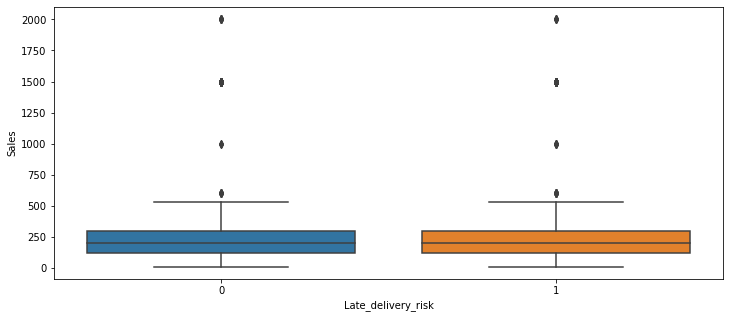

In [300]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Sales'])

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Sales'>

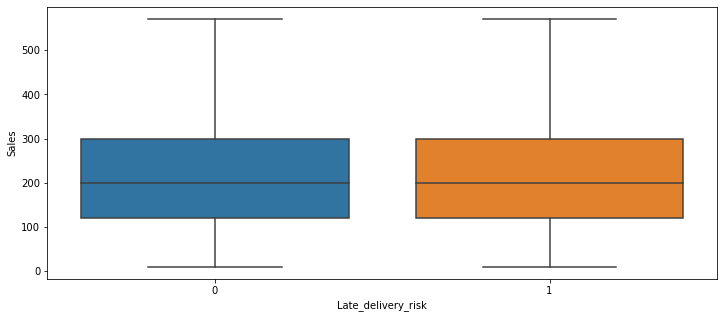

In [301]:
sns.boxplot(x=df['Late_delivery_risk'],y=x['Sales'])

In [ ]:
#

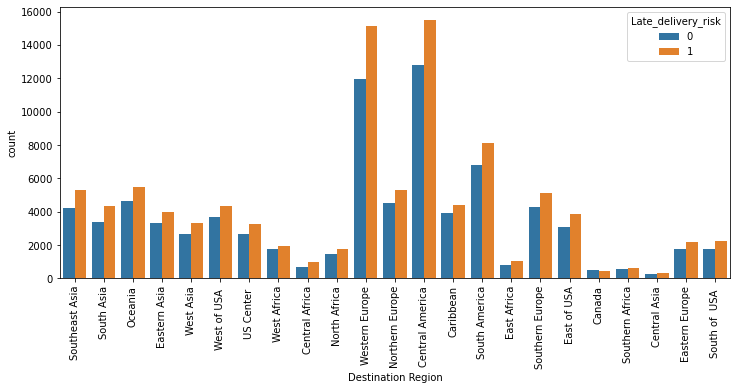

In [304]:
sns.countplot(df['Destination Region'],hue=df['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

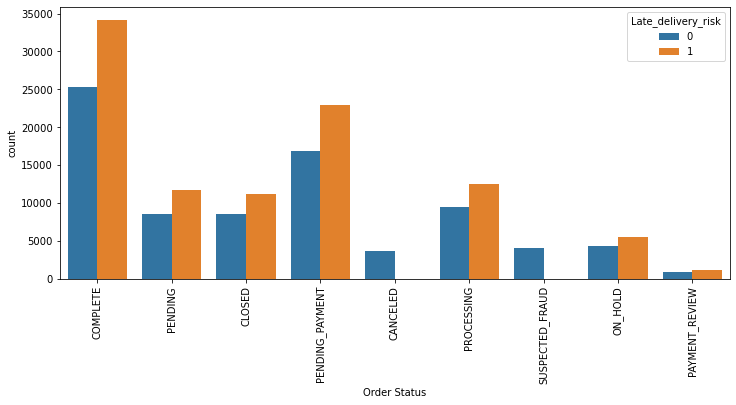

In [305]:
sns.countplot(df['Order Status'],hue=df['Late_delivery_risk'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#

<AxesSubplot:xlabel='Late_delivery_risk', ylabel='Product Price'>

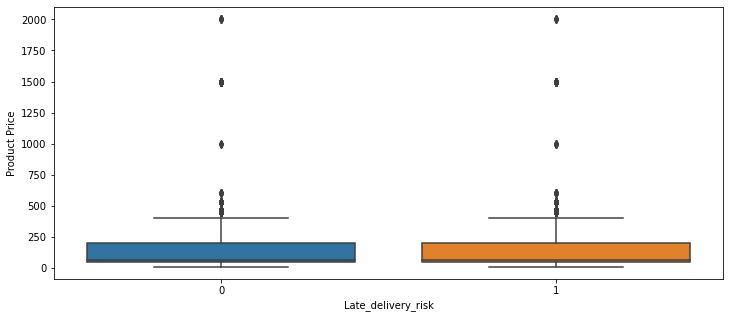

In [307]:
sns.boxplot(x=df['Late_delivery_risk'],y=df['Product Price'])

In [ ]:
#

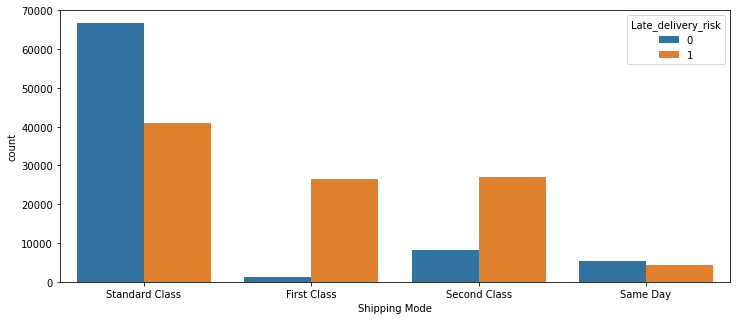

In [308]:
sns.countplot(df['Shipping Mode'],hue=df['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

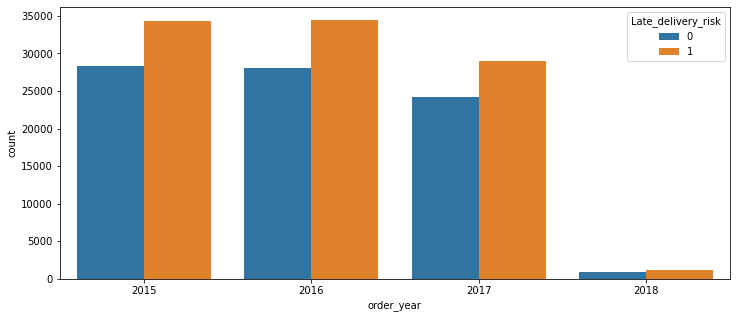

In [309]:
sns.countplot(df['order_year'],hue=df['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

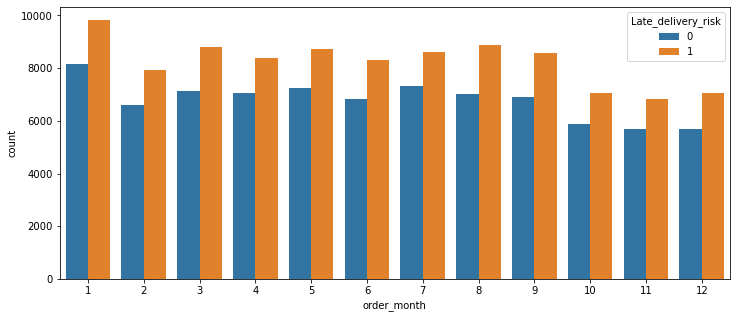

In [314]:
sns.countplot(df['order_month'],hue=df['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

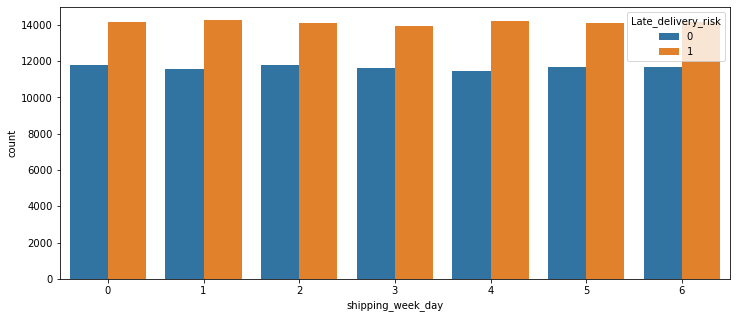

In [316]:
sns.countplot(df['shipping_week_day'],hue=df['Late_delivery_risk'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#

### Statistical Test for Categorical Variables with Target Variable

In [402]:
df.drop('Late_delivery_risk',1).select_dtypes(include='object').columns

Index(['Type', 'Delivery Status', 'Category Name', 'Source City',
       'Source Country', 'Customer Segment', 'Source State', 'Department Name',
       'Destination Market', 'Destination City', 'Destination Country',
       'order date (DateOrders)', 'Destination Region', 'Destination State',
       'Order Status', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode', 'customer full name'],
      dtype='object')

In [403]:
for i in df.drop('Late_delivery_risk',1).select_dtypes(include='object').columns:
    table=pd.crosstab(df[i],df['Late_delivery_risk'])
    test_stat, p, dof, expected_value = chi2_contingency(observed =table, correction = False)
    print('For feature ',i,"  p-value:", round(p,3))

For feature  Type   p-value: 0.0
For feature  Delivery Status   p-value: 0.0
For feature  Category Name   p-value: 0.716
For feature  Source City   p-value: 0.0
For feature  Source Country   p-value: 0.65
For feature  Customer Segment   p-value: 0.593
For feature  Source State   p-value: 0.0
For feature  Department Name   p-value: 0.758
For feature  Destination Market   p-value: 0.07
For feature  Destination City   p-value: 0.0
For feature  Destination Country   p-value: 0.0
For feature  order date (DateOrders)   p-value: 0.0
For feature  Destination Region   p-value: 0.0
For feature  Destination State   p-value: 0.0
For feature  Order Status   p-value: 0.0
For feature  Product Name   p-value: 0.815
For feature  shipping date (DateOrders)   p-value: 0.0
For feature  Shipping Mode   p-value: 0.0
For feature  customer full name   p-value: 0.0


### Statistical Test for Continuous Variables with Target Variable

In [405]:
df.select_dtypes(exclude='object').columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'Late by(Days)', 'order_year', 'order_month',
       'order_week_day', 'order_hour', 'shipping_year', 'shipping_month',
       'shipping_week_day', 'shipping_hour'],
      dtype='object')

In [408]:
for i in df.select_dtypes(exclude='object').columns:
    stat, p_value = stats.shapiro(df['Days for shipment (scheduled)'])
    print('Shapiro Test p value for',i,'is',p_value)

Shapiro Test p value for Days for shipping (real) is 0.0
Shapiro Test p value for Days for shipment (scheduled) is 0.0
Shapiro Test p value for Benefit per order is 0.0
Shapiro Test p value for Sales per customer is 0.0
Shapiro Test p value for Order Item Discount is 0.0
Shapiro Test p value for Order Item Discount Rate is 0.0
Shapiro Test p value for Order Item Product Price is 0.0
Shapiro Test p value for Order Item Profit Ratio is 0.0
Shapiro Test p value for Order Item Quantity is 0.0
Shapiro Test p value for Sales is 0.0
Shapiro Test p value for Product Price is 0.0
Shapiro Test p value for Late by(Days) is 0.0
Shapiro Test p value for order_year is 0.0
Shapiro Test p value for order_month is 0.0
Shapiro Test p value for order_week_day is 0.0
Shapiro Test p value for order_hour is 0.0
Shapiro Test p value for shipping_year is 0.0
Shapiro Test p value for shipping_month is 0.0
Shapiro Test p value for shipping_week_day is 0.0
Shapiro Test p value for shipping_hour is 0.0


In [521]:
#sns.boxplot(data=x)
#plt.xticks(rotation=90)
#plt.show()
x.head(1)

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,DEBIT,4,91.25,314.640015,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.11,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1.0,2018,1,2,22,2018,2,5,22


In [517]:
for i in x.select_dtypes(exclude='object').columns:
    stat, p_value = stats.shapiro(x[i])
    print('Shapiro Test p value for',i,'is',p_value)

Shapiro Test p value for Days for shipment (scheduled) is 0.0
Shapiro Test p value for Benefit per order is 0.0
Shapiro Test p value for Sales per customer is 0.0
Shapiro Test p value for Order Item Discount is 0.0
Shapiro Test p value for Order Item Discount Rate is 0.0
Shapiro Test p value for Order Item Product Price is 0.0
Shapiro Test p value for Order Item Profit Ratio is 0.0
Shapiro Test p value for Order Item Quantity is 0.0
Shapiro Test p value for Sales is 0.0
Shapiro Test p value for Product Price is 0.0
Shapiro Test p value for Late by(Days) is 0.0
Shapiro Test p value for order_year is 0.0
Shapiro Test p value for order_month is 0.0
Shapiro Test p value for order_week_day is 0.0
Shapiro Test p value for order_hour is 0.0
Shapiro Test p value for shipping_year is 0.0
Shapiro Test p value for shipping_month is 0.0
Shapiro Test p value for shipping_week_day is 0.0
Shapiro Test p value for shipping_hour is 0.0


In [409]:
for i in df.select_dtypes(exclude='object').columns:
    t0=df[df['Late_delivery_risk']==0][i]
    t1=df[df['Late_delivery_risk']==1][i]
    stat, p_value = stats.levene(t0,t1)
    print('Levene Test p value for',i,'is',p_value)

Levene Test p value for Days for shipping (real) is 0.0
Levene Test p value for Days for shipment (scheduled) is 0.0
Levene Test p value for Benefit per order is 0.24761951707525662
Levene Test p value for Sales per customer is 0.4783536449871655
Levene Test p value for Order Item Discount is 0.564013981711503
Levene Test p value for Order Item Discount Rate is 0.04378149054734958
Levene Test p value for Order Item Product Price is 0.4903075951020216
Levene Test p value for Order Item Profit Ratio is 0.23708119677557052
Levene Test p value for Order Item Quantity is 0.951698015544013
Levene Test p value for Sales is 0.7074737154876768
Levene Test p value for Product Price is 0.4903075951020216
Levene Test p value for Late by(Days) is 0.0
Levene Test p value for order_year is 0.25779924351112304
Levene Test p value for order_month is 0.5886179469887509
Levene Test p value for order_week_day is 0.8955369140042174
Levene Test p value for order_hour is 0.4952953295688447
Levene Test p valu

In [510]:
df_num['Days for shipment (scheduled)']= df['Days for shipment (scheduled)']

In [511]:
df_num.columns

Index(['Benefit per order', 'Sales per customer', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'Days for shipment (scheduled)'],
      dtype='object')

In [512]:
for i in df_num.columns:
    t0=df[df['Late_delivery_risk']==0][i]
    t1=df[df['Late_delivery_risk']==1][i]
    st,pval=stats.kruskal(t0,t1)
    print('Kruskal Test p value for',i,'is',round(pval,3))

Kruskal Test p value for Benefit per order is 0.209
Kruskal Test p value for Sales per customer is 0.261
Kruskal Test p value for Order Item Discount is 0.37
Kruskal Test p value for Order Item Discount Rate is 0.876
Kruskal Test p value for Order Item Product Price is 0.282
Kruskal Test p value for Order Item Profit Ratio is 0.673
Kruskal Test p value for Order Item Quantity is 0.812
Kruskal Test p value for Sales is 0.231
Kruskal Test p value for Product Price is 0.282
Kruskal Test p value for order_year is 0.317
Kruskal Test p value for order_month is 0.272
Kruskal Test p value for order_week_day is 0.633
Kruskal Test p value for order_hour is 0.0
Kruskal Test p value for Days for shipment (scheduled) is 0.0


In [ ]:
for i in df_num.columns:
    t0=df[df['Late_delivery_risk']==0][i]
    t1=df[df['Late_delivery_risk']==1][i]
    st,pval=stats.kruskal(t0,t1)
    print('Kruskal Test p value for',i,'is',round(pval,3))

In [414]:
for i in df.select_dtypes(exclude='object').columns:
    t0=df[df['Late_delivery_risk']==0][i]
    t1=df[df['Late_delivery_risk']==1][i]
    f_test, pval = stats.f_oneway(t0,t1)
    print('Kruskal Test p value for',i,'is',round(pval,3))

Kruskal Test p value for Days for shipping (real) is 0.0
Kruskal Test p value for Days for shipment (scheduled) is 0.0
Kruskal Test p value for Benefit per order is 0.113
Kruskal Test p value for Sales per customer is 0.108
Kruskal Test p value for Order Item Discount is 0.755
Kruskal Test p value for Order Item Discount Rate is 0.861
Kruskal Test p value for Order Item Product Price is 0.359
Kruskal Test p value for Order Item Profit Ratio is 0.324
Kruskal Test p value for Order Item Quantity is 0.952
Kruskal Test p value for Sales is 0.131
Kruskal Test p value for Product Price is 0.359
Kruskal Test p value for Late by(Days) is 0.0
Kruskal Test p value for order_year is 0.357
Kruskal Test p value for order_month is 0.274
Kruskal Test p value for order_week_day is 0.633
Kruskal Test p value for order_hour is 0.0
Kruskal Test p value for shipping_year is 0.851
Kruskal Test p value for shipping_month is 0.117
Kruskal Test p value for shipping_week_day is 0.754
Kruskal Test p value for s

In [378]:
df['Late_delivery_risk'].value_counts()

1    98973
0    81538
Name: Late_delivery_risk, dtype: int64

In [393]:
stat, p_value = stats.shapiro(df['Days for shipment (scheduled)'])
p_value

0.0

In [395]:
stat, p_value = stats.levene(t0,t1)
p_value

0.0

In [388]:
t0=df[df['Late_delivery_risk']==0]['Days for shipment (scheduled)']
t1=df[df['Late_delivery_risk']==1]['Days for shipment (scheduled)']

In [396]:
f_test, p_val = stats.f_oneway(t0,t1)

# print the test statistic and corresponding p-value
print('p-value:', p_val)

Test statistic: 28515.53235018071
p-value: 0.0


In [398]:
st,pval=stats.kruskal(t0,t1)

KruskalResult(statistic=27208.68204640635, pvalue=0.0)

### Model Building

In [318]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour,shipping_year,shipping_month,shipping_week_day,shipping_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1,2018,1,2,22,2018,2,5,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1,2018,1,5,12,2018,1,3,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,USA,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0,2018,1,5,12,2018,1,2,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,USA,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,-1,2018,1,5,11,2018,1,1,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,-2,2018,1,5,11,2018,1,0,11


In [357]:
df_drop=df.drop(['Days for shipping (real)','order date (DateOrders)','Destination Country','Product Name',
                 'shipping date (DateOrders)','Destination State','Destination City','customer full name',
                 'Delivery Status','Category Name','Source City','Late by(Days)','shipping_year','shipping_month',
                 'shipping_week_day','shipping_hour'],axis=1)

In [358]:
x=df_drop.drop('Late_delivery_risk',1)
y=df_drop['Late_delivery_risk']
df_drop_en=pd.get_dummies(x,drop_first=True)

df_drop_en.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_week_day,order_hour,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Source Country_USA,Customer Segment_Corporate,Customer Segment_Home Office,Source State_95758,Source State_AL,Source State_AR,Source State_AZ,Source State_CA,Source State_CO,Source State_CT,Source State_DC,Source State_DE,Source State_FL,Source State_GA,Source State_HI,Source State_IA,Source State_ID,Source State_IL,Source State_IN,Source State_KS,Source State_KY,Source State_LA,Source State_MA,Source State_MD,Source State_MI,Source State_MN,Source State_MO,Source State_MT,Source State_NC,Source State_ND,Source State_NJ,Source State_NM,Source State_NV,Source State_NY,Source State_OH,Source State_OK,Source State_OR,Source State_PA,Source State_PR,Source State_RI,Source State_SC,Source State_TN,Source State_TX,Source State_UT,Source State_VA,Source State_WA,Source State_WI,Source State_WV,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Destination Market_Europe,Destination Market_LATAM,Destination Market_Pacific Asia,Destination Market_USCA,Destination Region_Caribbean,Destination Region_Central Africa,Destination Region_Central America,Destination Region_Central Asia,Destination Region_East Africa,Destination Region_East of USA,Destination Region_Eastern Asia,Destination Region_Eastern Europe,Destination Region_North Africa,Destination Region_Northern Europe,Destination Region_Oceania,Destination Region_South America,Destination Region_South Asia,Destination Region_South of USA,Destination Region_Southeast Asia,Destination Region_Southern Africa,Destination Region_Southern Europe,Destination Region_US Center,Destination Region_West Africa,Destination Region_West Asia,Destination Region_West of USA,Destination Region_Western Europe,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,4,91.250000,314.640015,13.110000,0.04,327.75,0.29,1,327.75,327.75,2018,1,2,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4,-249.089996,311.359985,16.389999,0.05,327.75,-0.80,1,327.75,327.75,2018,1,5,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4,-247.779999,309.720001,18.030001,0.06,327.75,-0.80,1,327.75,327.75,2018,1,5,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,22.860001,304.809998,22.940001,0.07,327.75,0.08,1,327.75,327.75,2018,1,5,11,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,4,134.210007,298.250000,29.500000,0.09,327.75,0.45,1,327.75,327.75,2018,1,5,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [359]:
df_drop_en.shape,y.shape

((180511, 112), (180511,))

In [360]:
yint=y.astype('int')

In [361]:
xtrain,xtest,ytrain,ytest=train_test_split(df_drop_en,yint,test_size=.3,random_state=10)

In [362]:
xtrain.shape,ytrain.shape

((126357, 112), (126357,))

In [363]:
xtrain.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_week_day,order_hour,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Source Country_USA,Customer Segment_Corporate,Customer Segment_Home Office,Source State_95758,Source State_AL,Source State_AR,Source State_AZ,Source State_CA,Source State_CO,Source State_CT,Source State_DC,Source State_DE,Source State_FL,Source State_GA,Source State_HI,Source State_IA,Source State_ID,Source State_IL,Source State_IN,Source State_KS,Source State_KY,Source State_LA,Source State_MA,Source State_MD,Source State_MI,Source State_MN,Source State_MO,Source State_MT,Source State_NC,Source State_ND,Source State_NJ,Source State_NM,Source State_NV,Source State_NY,Source State_OH,Source State_OK,Source State_OR,Source State_PA,Source State_PR,Source State_RI,Source State_SC,Source State_TN,Source State_TX,Source State_UT,Source State_VA,Source State_WA,Source State_WI,Source State_WV,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Destination Market_Europe,Destination Market_LATAM,Destination Market_Pacific Asia,Destination Market_USCA,Destination Region_Caribbean,Destination Region_Central Africa,Destination Region_Central America,Destination Region_Central Asia,Destination Region_East Africa,Destination Region_East of USA,Destination Region_Eastern Asia,Destination Region_Eastern Europe,Destination Region_North Africa,Destination Region_Northern Europe,Destination Region_Oceania,Destination Region_South America,Destination Region_South Asia,Destination Region_South of USA,Destination Region_Southeast Asia,Destination Region_Southern Africa,Destination Region_Southern Europe,Destination Region_US Center,Destination Region_West Africa,Destination Region_West Asia,Destination Region_West of USA,Destination Region_Western Europe,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
79818,4,46.480000,165.990005,34.00,0.17,199.990005,0.28,1,199.990005,199.990005,2016,4,3,23,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
159828,4,105.589996,239.979996,60.00,0.20,299.980011,0.44,1,299.980011,299.980011,2017,4,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
74025,4,40.509998,191.990005,8.00,0.04,199.990005,0.21,1,199.990005,199.990005,2016,10,0,23,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
178495,4,-21.990000,249.899994,0.00,0.00,49.980000,-0.09,5,249.899994,49.980000,2015,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
155201,4,50.990002,135.970001,23.99,0.15,39.990002,0.38,4,159.960007,39.990002,2015,10,2,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [366]:
KNN=KNeighborsClassifier()
model2=KNN.fit(xtrain,ytrain)
ypred2=model2.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50     24442
           1       0.59      0.61      0.60     29712

    accuracy                           0.56     54154
   macro avg       0.55      0.55      0.55     54154
weighted avg       0.55      0.56      0.55     54154



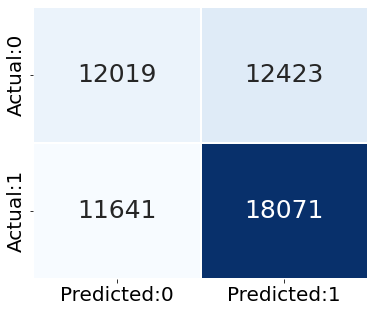

In [535]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred2)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [539]:
tn,fp,fn,tp=confusion_matrix(ytest, ypred2).ravel()
tn,fp,fn,tp

(12019, 12423, 11641, 18071)

In [365]:
LR=LogisticRegression()
model1=LR.fit(xtrain,ytrain)
ypred1=model1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70     24442
           1       0.78      0.59      0.67     29712

    accuracy                           0.69     54154
   macro avg       0.70      0.70      0.68     54154
weighted avg       0.71      0.69      0.68     54154

